In [1]:
print("test")

test


In [10]:
import pandas as pd
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
from LabData.DataLoaders.LifeStyleLoader import LifeStyleLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns
import re
import pickle
import matplotlib.pyplot as plt

In [11]:
stage = 'baseline' # 'baseline' or '02_00_visit' or '04_00_visit'
calc_adherence = True
david = True
show = False

In [4]:
stage_suf = stage.replace('_00', '') if stage.endswith('_00_visit') else stage

In [12]:
def explore_columns(df):
    for column in df.columns:
        print(column)
        print(df[column].value_counts())

## study_ids = [10, 1001, 1002]
# study_ids = [10]
study_ids=[10, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
subjects_dl = SubjectLoader()
subjects_data = subjects_dl.get_data(groupby_reg='first', study_ids=study_ids)
subjects_df = subjects_data.df

print(subjects_df["age"])

RegistrationCode  Date                      
10K_1000028368    2020-03-22 08:26:05.077073    54.0
10K_1000273395    2020-03-05 20:53:54.399388    41.0
10K_1000633050    2021-06-21 14:23:50.372010    66.0
10K_1000942861    2021-06-11 11:30:37.386358    54.0
10K_1001106466    2024-12-15 15:42:22.632981    59.0
                                                ... 
10K_9999226141    2019-12-04 07:07:07.815688    41.0
10K_9999409119    2020-02-22 15:19:08.365584    54.0
10K_9999623844    2023-02-19 01:46:16.838996    55.0
10K_9999732920    2022-12-23 22:20:48.083986    43.0
10K_9999767769    2020-01-31 09:11:04.104338    48.0
Name: age, Length: 30472, dtype: float64


## Load Diet Data

In [6]:
if stage != 'baseline':
    if not david:
        with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists_diet.pkl', 'rb') as file:
            loaded_lists = pickle.load(file)
        base_features, all_diet_features = loaded_lists
    else:
        with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/my_lists_diet.pkl', 'rb') as file:
            loaded_lists = pickle.load(file)
        base_features, all_diet_features = loaded_lists


In [7]:
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/food_shortnames.pkl', 'rb') as file:
    food_shortnames = pickle.load(file)
food_shortnames

Index(['Acorn squash', 'Alfalfa sprouts', 'Almond Beverage', 'Almond flour',
       'Almond spread', 'Almonds', 'Amba', 'Apple', 'Apple Cake',
       'Apple Vinegar',
       ...
       'Yellow pepper', 'Yogurt', 'Zaatar', 'Zucchini', 'Zucchini Patties',
       'black pepper', 'dried tomato spread', 'emmer wheat bread', 'ginger',
       'kale'],
      dtype='object', name='shortname_eng', length=570)

In [8]:
list(food_shortnames)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [13]:
dll = DietLoggingLoader()
dlld = dll.get_data(study_ids=study_ids)
log = get_diet_logging_around_stage(dlld.df, stage=stage, delta_before=2, delta_after=14)
log = log.reset_index()
log = log.set_index(['RegistrationCode','Date','food_id'])
print(log.head(10))

                                                    weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1000942861   2021-12-13 11:14:00+00:00 1006814     6.0       3       NaN   
                 2021-12-13 12:48:00+00:00 1008452   150.0      50       NaN   
                                           1008466   221.0      48       NaN   
                                           1010359   130.0      31       NaN   
                                           1013302   100.0      21       NaN   
                                           1014090   100.0     nan       NaN   
                 2021-12-13 18:11:00+00:00 1006875   182.0      41       NaN   
                 2021-12-13 18:59:00+00:00 1008923   100.0      41       NaN   
                 2021-12-13 20:51:00+00:00 1009132    25.0      38       NaN   
                                           1012898   302.0       1       NaN   

                                       

In [393]:
len(set(log.index.get_level_values(0)))

2265

In [394]:
len(set(log.index.get_level_values(0).values))

2265

## Add Nutrients

In [395]:
# nutr_list = list(dll.food_nutrients.columns)
# nutr_list = ['caffeine_mg','calcium_mg','carbohydrate_g',
# 'cholesterol_mg',
# 'energy_kcal',
# 'iron_mg',
# 'magnesium_mg',
# 'niacin_mg',
# 'phosphorus_mg',
# 'potassium_mg',
# 'protein_g',
# 'raevitamina_ug',
# 'riboflavin_mg',
# 'sodium_mg',
# 'thiamin_mg',
# 'totaldietaryfiber_g',
# 'totalfolate_ug',
# 'totallipid_g',
# 'totalmonounsaturatedfattyacids_g',
# 'totalpolyunsaturatedfattyacids_g',
# 'totalsaturatedfattyacids_g',
# 'vitaminb12_ug',
# 'vitaminb6_mg',
# 'vitaminc_mg',
# 'vitamind_iu',
# 'vitamine_mg',
# 'zinc_mg',
# 'alcohol_g']

# # log_date = dll.add_nutrients(log, nutrient_list=nutr_list)
log_date = dll.add_new_nutrients(log)
log_date


# log_date = pd.read_pickle(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/log_date_add_new_nutrients_{stage}.pkl')
# log_date

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1007599726   2023-07-31 05:50:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
                                           1011783   120.0      40       NaN   
                                           1012601   120.0      31       NaN   
                 2023-08-06 06:00:00+00:00 1006814     6.0       3       NaN   
...                                                    ...     ...       ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319   186.0      41       NaN   
                                           1012524    89.0      40       NaN   
                 2023-12-13 11:10:00+00:00 1011116   240.0       1       NaN   
                 2023-12-13 12:37:00+00:00 1010363   200.0      47       NaN   
                                           1010437    90.0     nan       NaN   

                                                   score   Protein  \
RegistrationCode Date                      food_id                   
10K_1007599726   2023-07-31 05:50:00+00:00 1006814   NaN   0.00720   
                                           1008880   NaN   1.92750   
                                           1011783   NaN   1.84000   
                                           1012601   NaN  14.50800   
                 2023-08-06 06:00:00+00:00 1006814   NaN   0.00720   
...                                                  ...       ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319   NaN   1.67400   
                                           1012524   NaN   0.81435   
                 2023-12-13 11:10:00+00:00 1011116   NaN   3.71520   
                 2023-12-13 12:37:00+00:00 1010363   NaN   1.60000   
                                           1010437   NaN   7.00200   

                                                    Total lipid (fat)  \
RegistrationCode Date                      food_id                      
10K_1007599726   2023-07-31 05:50:00+00:00 1006814            0.00120   
                                           1008880            2.00700   
                                           1011783            3.49200   
                                           1012601           15.90000   
                 2023-08-06 06:00:00+00:00 1006814            0.00120   
...                                                               ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319            0.18600   
                                           1012524            0.27145   
                 2023-12-13 11:10:00+00:00 1011116            1.35360   
                 2023-12-13 12:37:00+00:00 1010363            4.80000   
                                           1010437           16.03800   

                                                    Carbohydrate, by difference  \
RegistrationCode Date                      food_id                                
10K_1007599726   2023-07-31 05:50:00+00:00 1006814                     0.000000   
                                           1008880                     2.829000   
                                           1011783                    21.688000   
                                           1012601                     0.882000   
                 2023-08-06 06:00:00+00:00 1006814                     0.000000   
...                                                                         ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319                    17.483999   
                                           1012524                    20.265300   
                 2023-12-13 11:10:00+00:00 1011116                     6.556800   
                 2023-12-13 12:37:00+00:00 1010363                     6.200000   
                                           1010437                    13.500000   

                                                        Energy  \
Regi

In [396]:
# log_date.to_pickle(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_date_add_new_nutrients_{stage}.pkl')

In [397]:
nutr_list = log_date.columns[4:]
nutr_list

Index(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference', 'Energy',
       'Alcohol, ethyl', 'Water', 'Fiber, total dietary', 'Calcium, Ca',
       'Iron, Fe', 'Magnesium, Mg',
       ...
       'Vitamin B-12, added', 'Vitamin D (D2 + D3), International Units',
       'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)',
       'Vitamin E, added', 'Vitamin K (Dihydrophylloquinone)',
       'Vitamin K (Menaquinone-4)', 'Vitamin K (phylloquinone)',
       'Sugars, total including NLEA', 'matched_food_score'],
      dtype='object', length=154)

In [398]:
vitamin_d_cols = [x for x in nutr_list if 'Vitamin D' in x]
vitamin_d_d2_d3_count = (log_date[vitamin_d_cols[0]] > 0).sum()
vitamin_d_international_units_count = (log_date[vitamin_d_cols[1]] > 0).sum()

if vitamin_d_d2_d3_count > vitamin_d_international_units_count:
    print("Vitamin D (D2 + D3) has more values above 0.")
else:
    print("Vitamin D (D2 + D3), International Units has more values above 0.")


Vitamin D (D2 + D3) has more values above 0.


In [399]:
# Unite similar features by summing them up
log_date['omega_6'] = log_date[['PUFA 18:2 n-6 c,c', 'PUFA 20:4 n-6', 'PUFA 18:2 CLAs', 'PUFA 18:2 i', 'PUFA 20:2 n-6 c,c', 'PUFA 2:4 n-6', 'PUFA 22:4', 'PUFA 18:3 n-6 c,c,c']].sum(axis=1)
log_date['omega_3'] = log_date[['PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 18:4', 'PUFA 20:5 n-3 (EPA)', 'PUFA 22:6 n-3 (DHA)', 'PUFA 22:5 n-3 (DPA)', 'PUFA 20:3 n-3']].sum(axis=1)
log_date['vitamin_E'] = log_date[['Vitamin E (alpha-tocopherol)', 'Tocopherol, beta', 'Tocopherol, delta', 'Tocopherol, gamma', 'Tocotrienol, alpha', 'Tocotrienol, beta', 'Tocotrienol, delta', 'Tocotrienol, gamma']].sum(axis=1)

# Drop the original columns after uniting
columns_to_drop = [
    'SFA 4:0', 'SFA 6:0', 'SFA 8:0', 'SFA 10:0', 'SFA 12:0', 'SFA 14:0', 'SFA 16:0', 'SFA 18:0', 'SFA 13:0', 'SFA 15:0', 'SFA 17:0', 'SFA 20:0', 'SFA 22:0', 'SFA 24:0',
    'MUFA 14:1', 'MUFA 15:1', 'MUFA 16:1', 'MUFA 17:1', 'MUFA 18:1', 'MUFA 18:1 c', 'MUFA 20:1', 'MUFA 22:1', 'MUFA 24:1 c', 'MUFA 16:1 c', 'MUFA 22:1 c', 'MUFA 18:1-11 t (18:1t n-7)',
    'PUFA 18:2 n-6 c,c', 'PUFA 20:4 n-6', 'PUFA 18:2 CLAs', 'PUFA 18:2 i', 'PUFA 20:2 n-6 c,c', 'PUFA 2:4 n-6', 'PUFA 22:4', 'PUFA 18:3 n-6 c,c,c',
    'PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 18:4', 'PUFA 20:5 n-3 (EPA)', 'PUFA 22:6 n-3 (DHA)', 'PUFA 22:5 n-3 (DPA)', 'PUFA 20:3 n-3',
    'TFA 16:1 t', 'TFA 18:1 t', 'TFA 18:2 t not further defined', 'TFA 18:2 t,t', 'TFA 22:1 t',
    'Vitamin A, IU', 'Carotene, beta', 'Retinol', 'Carotene, alpha', 'Cryptoxanthin, beta',
    'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)', 'Vitamin D (D2 + D3), International Units', 
    'Vitamin K (Dihydrophylloquinone)', 'Vitamin K (Menaquinone-4)', 'Vitamin K (phylloquinone)',
    'Vitamin E (alpha-tocopherol)', 'Tocopherol, beta', 'Tocopherol, delta', 'Tocopherol, gamma', 'Tocotrienol, alpha', 'Tocotrienol, beta', 'Tocotrienol, delta', 'Tocotrienol, gamma', 'Vitamin E, added',
    'Folate, DFE', 'Sugars, total including NLEA',
    'Fatty acids, total trans-monoenoic', 'Fatty acids, total trans-polyenoic', 'Folate, DFE', 'Folate, food', 'Folic acid',
    'Galactose', 'Lactose', 'Maltose',  'PUFA 18:2', 'PUFA 18:3', 'PUFA 18:3i', 'PUFA 20:3', 'PUFA 20:4', 'PUFA 21:5',
    'Theobromine', 'Stigmasterol', 'Beta-sitosterol', 'Sucrose', 'matched_food_score',
    'Isoleucine', 'Leucine', 'Valine', 'Lysine', 'Threonine', 'Methionine', 'Phenylalanine', 'Tryptophan', 'Histidine',
    'Tyrosine', 'Arginine', 'Cystine', 'Serine', 'Alanine', 'Aspartic acid', 'Glutamic acid', 'Glycine', 'Hydroxyproline', 'Proline'
]

log_date.drop(columns=columns_to_drop, inplace=True)

# Optional: remove additional duplicates like 'Vitamin B-12, added' if needed
log_date.drop(columns=['Vitamin B-12, added'], inplace=True, errors='ignore')

# Ensure to keep only 'Folate, total'
log_date = log_date.loc[:, ~log_date.columns.duplicated()]


In [400]:
nutr_list = list(log_date.columns[4:])
nutr_list

['Protein',
 'Total lipid (fat)',
 'Carbohydrate, by difference',
 'Energy',
 'Alcohol, ethyl',
 'Water',
 'Fiber, total dietary',
 'Calcium, Ca',
 'Iron, Fe',
 'Magnesium, Mg',
 'Phosphorus, P',
 'Potassium, K',
 'Sodium, Na',
 'Zinc, Zn',
 'Copper, Cu',
 'Vitamin C, total ascorbic acid',
 'Thiamin',
 'Riboflavin',
 'Niacin',
 'Vitamin B-6',
 'Folate, total',
 'Vitamin B-12',
 'Cholesterol',
 'Fatty acids, total saturated',
 'Fatty acids, total monounsaturated',
 'Fatty acids, total polyunsaturated',
 'Vitamin D (D2 + D3)',
 'Sugars, Total',
 'Fatty acids, total trans',
 'Vitamin A, RAE',
 'Pantothenic acid',
 'Selenium, Se',
 'Choline, total',
 'Manganese, Mn',
 'Fructose',
 'Vitamin K',
 'Iodine',
 'Sugar alcohols',
 'Biotin',
 'Ash',
 'Betaine',
 'Caffeine',
 'Campesterol',
 'Fluoride, F',
 'Glucose',
 'Lutein + zeaxanthin',
 'Lycopene',
 'Phytosterols',
 'Starch',
 'omega_6',
 'omega_3',
 'vitamin_E']

In [401]:
# corr_matrix = log_date[log_date.columns[4:]].corr()

In [402]:
# high_corr_pairs = corr_matrix[(np.abs(corr_matrix) > 0.9) & (corr_matrix != 1.0)]

# # Step 3: Unstack and filter to get pairs of features with correlation > 0.8
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [403]:
pd.reset_option('display.max_rows')

## Filter Foods Log

In [404]:
log_date = dll.add_short_food_names(log_date)
log_date = dll.add_food_categories(log_date)
log_date

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1007599726   2023-07-31 05:50:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
                                           1011783   120.0      40       NaN   
                                           1012601   120.0      31       NaN   
                 2023-08-06 06:00:00+00:00 1006814     6.0       3       NaN   
...                                                    ...     ...       ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319   186.0      41       NaN   
                                           1012524    89.0      40       NaN   
                 2023-12-13 11:10:00+00:00 1011116   240.0       1       NaN   
                 2023-12-13 12:37:00+00:00 1010363   200.0      47       NaN   
                                           1010437    90.0     nan       NaN   

                                                   score   Protein  \
RegistrationCode Date                      food_id                   
10K_1007599726   2023-07-31 05:50:00+00:00 1006814   NaN   0.00720   
                                           1008880   NaN   1.92750   
                                           1011783   NaN   1.84000   
                                           1012601   NaN  14.50800   
                 2023-08-06 06:00:00+00:00 1006814   NaN   0.00720   
...                                                  ...       ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319   NaN   1.67400   
                                           1012524   NaN   0.81435   
                 2023-12-13 11:10:00+00:00 1011116   NaN   3.71520   
                 2023-12-13 12:37:00+00:00 1010363   NaN   1.60000   
                                           1010437   NaN   7.00200   

                                                    Total lipid (fat)  \
RegistrationCode Date                      food_id                      
10K_1007599726   2023-07-31 05:50:00+00:00 1006814            0.00120   
                                           1008880            2.00700   
                                           1011783            3.49200   
                                           1012601           15.90000   
                 2023-08-06 06:00:00+00:00 1006814            0.00120   
...                                                               ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319            0.18600   
                                           1012524            0.27145   
                 2023-12-13 11:10:00+00:00 1011116            1.35360   
                 2023-12-13 12:37:00+00:00 1010363            4.80000   
                                           1010437           16.03800   

                                                    Carbohydrate, by difference  \
RegistrationCode Date                      food_id                                
10K_1007599726   2023-07-31 05:50:00+00:00 1006814                     0.000000   
                                           1008880                     2.829000   
                                           1011783                    21.688000   
                                           1012601                     0.882000   
                 2023-08-06 06:00:00+00:00 1006814                     0.000000   
...                                                                         ...   
10K_9984191583   2023-12-12 19:50:00+00:00 1009319                    17.483999   
                                           1012524                    20.265300   
                 2023-12-13 11:10:00+00:00 1011116                     6.556800   
                 2023-12-13 12:37:00+00:00 1010363                     6.200000   
                                           1010437                    13.500000   

                                                        Energy  \
Regi

In [405]:
log_date = log_date.reset_index()
log_date['Day'] = log_date['Date'].astype(str).str[:10]
log_date['Hour'] = log_date['Date'].astype(str).str[10:16]
log_date.drop('Date', axis=1, inplace=True)
log_date = log_date.set_index(['RegistrationCode','Day','Hour','food_id'])
print(log_date.head())

                                            weight unit_id meal_type score  \
RegistrationCode Day        Hour   food_id                                   
10K_1007599726   2023-07-31  05:50 1006814     6.0       3       NaN   NaN   
                                   1008880    60.0       2       NaN   NaN   
                                   1011783   120.0      40       NaN   NaN   
                                   1012601   120.0      31       NaN   NaN   
                 2023-08-06  06:00 1006814     6.0       3       NaN   NaN   

                                            Protein  Total lipid (fat)  \
RegistrationCode Day        Hour   food_id                               
10K_1007599726   2023-07-31  05:50 1006814   0.0072             0.0012   
                                   1008880   1.9275             2.0070   
                                   1011783   1.8400             3.4920   
                                   1012601  14.5080            15.9000   
         

In [406]:
# Filter all entries with NaN shortname or Energy
log_date = log_date[~log_date['shortname_eng'].isna()]
log_date = log_date[~log_date['Energy'].isna()]
log_date.shape

(305808, 63)

In [407]:
len(set(log_date.index.get_level_values(0)))

2260

In [408]:
# Filter foods that are not present in >1% of the cohort
log_date = log_date[log_date['shortname_eng'].isin(food_shortnames)]
log_date.shape

(299443, 63)

In [409]:
# Filter foods that have no nutrient data, other than sugar substitutes
# Filter rows where all nutrient values are 0
log_date = log_date[~((log_date[nutr_list] == 0).all(axis=1) & (log_date['shortname_eng'] != "Sugar substitute"))]
log_date.shape

(299436, 63)

In [410]:
# Filter Poppy seed cake and Salep, which have incorrect nutrient data
log_date = log_date[~log_date['shortname_eng'].isin(["Poppy seed cake", "Salep"])]
# Filter taster's choice which has calories inconsistent with other coffee types
log_date = log_date[~log_date['name'].str.contains("Tasters")]
log_date.shape

(297766, 63)

In [411]:
# Filter Halva entries with incorrect nutrient data
log_date = log_date[~((log_date['shortname_eng'] == "Halva") & (log_date['Total lipid (fat)'] == 0))]
log_date.shape

(297746, 63)

In [412]:
# Filter unrealistic energy values
log_date = log_date[(log_date["Energy"] >= 0) & (log_date["Energy"] < 3000)]
log_date.shape

(297733, 63)

In [413]:
# Filter unrealistic weight values
log_date = log_date[(log_date["weight"] >= 0) & (log_date["weight"] < 2400)]
log_date.shape

(297715, 63)

In [414]:
# Filter duplicate entries
log_date_reset = log_date.reset_index()
log_date = log_date_reset[
    ~log_date_reset.duplicated(subset=['RegistrationCode', 'Day', 'food_id', 'Hour', 'weight'], keep='first')
].set_index(['RegistrationCode', 'Day', 'food_id', 'Hour'])
log_date.shape

(297715, 63)

In [415]:
# Filter foods without NOVA food scores
NOVA = pd.read_excel('/net/mraid20/export/genie/LabData/Data/10K/foods/processed_foods_mappingV4.xlsx').rename(columns = {'foodid 10k':'food_id'}).dropna(subset=['Score'])
NOVA

,% of calories,food_id,Score,Unnamed: 3,Name 10k,D2ID,Unnamed: 6
0,1.443412,1010363.0,1.0,NaN,סלט ירקות עם שמן זית,75145088,סלט ירקות עם שמן זית
1,1.251932,1012524.0,1.0,NaN,בננה,NaN,NaN
2,1.204728,1013302.0,3.0,NaN,פיתה,NaN,NaN
3,1.043617,1011117.0,1.0,NaN,אבוקדו,63105010,אבוקדו
4,1.002832,1010403.0,1.0,NaN,אורז לבן מבושל,NaN,NaN
...,...,...,...,...,...,...,...
7981,NaN,1014947.0,4.0,NaN,חטיף פיטנס פירות יער,NaN,NaN
7982,NaN,1014948.0,4.0,NaN,יוגורט דנונה פרו 20 קרמל מלוח 0%,NaN,NaN
7983,NaN,1014949.0,4.0,NaN,פילה סויה ענק סוי ג'וי מבושל במים,NaN,NaN
7984,NaN,1014950.0,3.0,NaN,שניצל ללא גלוטן מאמא עוף,NaN,NaN


In [416]:
NOVA['food_id'] = NOVA['food_id'].astype(int).astype(str)
log_date_reset = log_date.reset_index()
merged_df = log_date_reset.merge(NOVA[['food_id', 'Score']], on='food_id', how='left')
log_date = merged_df.set_index(log_date.index.names)
log_date = log_date.dropna(subset=['Score'])
log_date = log_date.rename(columns={'Score': 'NOVA_score'})
log_date.shape

(297269, 64)

In [417]:
before_any_filters = log_date.reset_index()["RegistrationCode"].nunique()
before_any_filters

2260

In [418]:
# Filter logging days with <500 calories or >4000 calories

total_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum')
log_date['total_energy_per_day'] = total_energy_per_day
log_date = log_date[(log_date['total_energy_per_day'] >= 500) & (log_date['total_energy_per_day'] <= 4000)]
log_date.shape

(288120, 65)

In [419]:
# Validate filtering
log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum').describe()

count    288120.000000
mean       1532.279528
std         581.219725
min         500.053999
25%        1110.245666
50%        1454.090016
75%        1870.910002
max        3984.696196
Name: Energy, dtype: float64

In [420]:
# Filter outlier days that might be under-documentation.

# Assuming `log_date` is your DataFrame
# Calculating energy per day
log_date_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().reset_index()

# Grouping by RegistrationCode to calculate mean and std
stats = log_date_energy_per_day.groupby('RegistrationCode')['Energy'].agg(['mean', 'std'])

# Merging stats back to a new DataFrame
log_date_with_stats = log_date_energy_per_day.merge(stats, on='RegistrationCode')

# Defining outliers: Energy values outside mean ± 2*std
log_date_with_stats['is_outlier_below'] = (log_date_with_stats['Energy'] < (log_date_with_stats['mean'] - 2.5 * log_date_with_stats['std'])) #| \
                                    #(log_date_with_stats['Energy'] > (log_date_with_stats['mean'] + 2 * log_date_with_stats['std']))

# Filtering outlier days
# outliers = log_date_with_stats[log_date_with_stats['is_outlier']][['RegistrationCode', 'Day', 'Energy', 'is_outlier']]
outliers = log_date_with_stats[log_date_with_stats['is_outlier_below']][['RegistrationCode', 'Day', 'Energy', 'is_outlier_below']]

# Display the outliers
print(outliers)
# print(log_date_with_stats[log_date_with_stats['RegistrationCode'] == '10K_1455707672'])


      RegistrationCode         Day       Energy  is_outlier_below
876     10K_1323836258  2024-08-03   758.612862              True
6523    10K_3655460990  2023-08-27  1085.792137              True
6791    10K_3770644262  2023-06-18   562.313339              True
7145    10K_3891106955  2024-07-27   763.492846              True
9553    10K_4809349051  2023-11-20   609.713857              True
9615    10K_4842200449  2023-09-20   685.739996              True
14405   10K_6703817735  2025-03-28  1027.958328              True
18131   10K_8353258684  2024-01-25   841.016666              True
20357   10K_9109899166  2024-02-25   573.920000              True


In [421]:
# Filter outlier days
log_date = log_date[~log_date_with_stats.set_index(['RegistrationCode', 'Day'])['is_outlier_below']]
log_date.shape

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(288029, 65)

In [422]:
log_date.head(20)

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1007599726   2023-08-06 1006814  06:00     6.0       3       NaN   NaN   
                            1008880  06:00    60.0       2       NaN   NaN   
                            1012989  06:00    49.0      41       NaN   NaN   
                            1006814  09:07     6.0       3       NaN   NaN   
                            1008880  09:07    60.0       2       NaN   NaN   
                            1006814  11:08     6.0       3       NaN   NaN   
                            1007972  11:08    20.0      21       NaN   NaN   
                            1008880  11:08    60.0       2       NaN   NaN   
                            1009606  11:08    16.0     nan       NaN   NaN   
                            1009118  12:09   150.0      11       NaN   NaN   
                            1006814  13:17     6.0       3       NaN   NaN   
                            1008289  13:17   152.0      52       NaN   NaN   
                            1008880  13:17    60.0       2       NaN   NaN   
                            1012100  13:17    98.0      41       NaN   NaN   
                            1006875  17:11   182.0      41       NaN   NaN   
                            1006814  19:07     6.0       3       NaN   NaN   
                            1008880  19:07    60.0       2       NaN   NaN   
                            1012100  19:07    25.0     nan       NaN   NaN   
                            1012524  19:07   106.0      41       NaN   NaN   
                 2023-08-07 1006814  05:04     6.0       3       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00   0.00720           0.001200   
                            1008880  06:00   1.92750           2.007000   
                            1012989  06:00   6.00740           5.630100   
                            1006814  09:07   0.00720           0.001200   
                            1008880  09:07   1.92750           2.007000   
                            1006814  11:08   0.00720           0.001200   
                            1007972  11:08   3.18100           9.232500   
                            1008880  11:08   1.92750           2.007000   
                            1009606  11:08   0.92704           5.651840   
                            1009118  12:09   7.95000           4.500000   
                            1006814  13:17   0.00720           0.001200   
                            1008289  13:17  37.24000          27.055999   
                            1008880  13:17   1.92750           2.007000   
                            1012100  13:17   1.53370           6.208300   
                            1006875  17:11   1.66075           4.627350   
                            1006814  19:07   0.00720           0.001200   
                            1008880  19:07   1.92750           2.007000   
                            1012100  19:07   0.39125           1.583750   
                            1012524  19:07   0.96990           0.323300   
                 2023-08-07 1006814  05:04   0.00720           0.001200   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00                     0.000000   
                            1008880  06:00                     2.829000   
                            1012989  06:00                     0.490000   
                            1006814  09:07                     0.000000   
                            1008880  09:07                     2.829000   
                            1006814  11:08                     0.000000   
                            1007972  11:08                     6.364500   
 

In [423]:
# Filter People with less than 3 days of diet documentation.
# Group by RegistrationCode and count the number of unique days using the index level 'Day'
unique_day_counts = log_date.groupby('RegistrationCode').apply(lambda x: x.index.get_level_values('Day').nunique())

# Filter out RegistrationCodes with less than 3 unique days
valid_registration_codes = unique_day_counts[unique_day_counts >= 3].index

# Create a new DataFrame with only the valid RegistrationCodes
log_date = log_date.loc[valid_registration_codes]

# Display the filtered DataFrame
print(log_date.shape)


(285710, 65)


In [424]:
people_more_than_3 = log_date.reset_index()["RegistrationCode"].nunique()
people_more_than_3

2024

In [425]:
people_more_than_8 = log_date.reset_index()["RegistrationCode"].nunique()
people_more_than_8

2024

In [426]:
before_any_filters

2260

In [427]:
unique_day_counts

RegistrationCode
10K_1007599726     3
10K_1012020971    12
10K_1012289523    13
10K_1019625838    14
10K_1021660035    12
                  ..
10K_9972023164    13
10K_9974013758     9
10K_9976173468    14
10K_9977346258     2
10K_9984191583     8
Length: 2211, dtype: int64

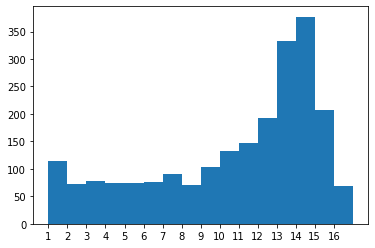

In [428]:
plt.hist(unique_day_counts, bins=range(1, unique_day_counts.max()+2))
plt.xticks(range(1, unique_day_counts.max()+1))
plt.show()


In [429]:
exact_7_days = (unique_day_counts == 7).sum()
more_than_14_days = (unique_day_counts >= 14).sum()
less_than_14_days = ((unique_day_counts < 14) & (unique_day_counts > 7)).sum()

print(f"Number of unique_day_counts with exactly 7 days: {exact_7_days}")
print(f"Number of unique_day_counts with 14 or more days: {more_than_14_days}")
print(f"Number of unique_day_counts with less than 14 days: {less_than_14_days}")


Number of unique_day_counts with exactly 7 days: 90
Number of unique_day_counts with 14 or more days: 653
Number of unique_day_counts with less than 14 days: 977


In [430]:
days_saved = ((unique_day_counts < 8) & (unique_day_counts >= 3)).sum()

print(f"Number of unique_day_counts with 4<=x<=7 days: {days_saved}")


Number of unique_day_counts with 4<=x<=7 days: 394


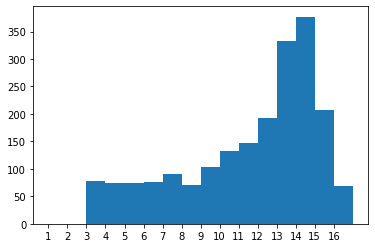

In [431]:
# validate filtering:
# Group by RegistrationCode and count the number of unique days using the index level 'Day'
unique_day_counts_after = log_date.groupby('RegistrationCode').apply(lambda x: x.index.get_level_values('Day').nunique())
plt.hist(unique_day_counts_after, bins=range(1, unique_day_counts_after.max()+2))
plt.xticks(range(1, unique_day_counts_after.max()+1))
plt.show()

In [432]:
# # Validate filtering:
# # Group by RegistrationCode and count the number of unique days using the 'Date' index level
# unique_day_counts_after = log_date.groupby('RegistrationCode').apply(
#     lambda x: pd.to_datetime(x.index.get_level_values('Date')).normalize().nunique()
# )

# # Plot histogram of the unique day counts
# plt.hist(unique_day_counts_after, bins=range(1, unique_day_counts_after.max() + 2))
# plt.xticks(range(1, unique_day_counts_after.max() + 1))
# plt.show()


In [433]:
log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().describe()
# max_calories_registration_code = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().idxmax()[0]
# print(max_calories_registration_code)


count    22535.000000
mean      1421.357216
std        571.813920
min        500.053999
25%        995.109352
50%       1337.463991
75%       1747.479824
max       3984.696196
Name: Energy, dtype: float64

In [434]:
log_date.reset_index()["RegistrationCode"].nunique()

2024

## Add Food Patterns

In [435]:
log_date['total_energy_per_day']

RegistrationCode  Day         food_id  Hour  
10K_1007599726    2023-08-06  1006814   06:00    1463.855996
                              1008880   06:00    1463.855996
                              1012989   06:00    1463.855996
                              1006814   09:07    1463.855996
                              1008880   09:07    1463.855996
                                                    ...     
10K_9984191583    2023-12-12  1008938   17:24    1481.650000
                              1010094   17:24    1481.650000
                              1013053   17:24    1481.650000
                              1009319   19:50    1481.650000
                              1012524   19:50    1481.650000
Name: total_energy_per_day, Length: 285710, dtype: float64

In [436]:
nutr_list_no_energy = [nutrient for nutrient in nutr_list if nutrient != "Energy"]
relative_nutrients = log_date[nutr_list_no_energy].div(log_date['total_energy_per_day'], axis=0)
# relative_nutrients.to_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/relative_nutrients.pkl')

In [437]:
log_date[nutr_list_no_energy] = relative_nutrients

In [438]:
foods_per_meal = log_date.reset_index().groupby(['RegistrationCode', 'Day', 'Hour'])['food_id'].count()
# foods_per_meal = foods_per_meal.reset_index().groupby(['RegistrationCode', "Day"]).mean()
foods_per_meal = foods_per_meal.reset_index().drop('Hour', axis=1).groupby(['RegistrationCode', "Day"]).mean()
foods_per_meal

food_id
RegistrationCode Day                 
10K_1007599726   2023-08-06  2.714286
                 2023-08-07  2.800000
                 2023-08-08  2.500000
10K_1012020971   2023-05-10  3.400000
                 2023-05-11  3.833333
...                               ...
10K_9984191583   2023-12-08  3.250000
                 2023-12-09  1.666667
                 2023-12-10  3.333333
                 2023-12-11  2.000000
                 2023-12-12  3.250000

[22535 rows x 1 columns]

In [439]:
foods_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['food_id'].nunique()
foods_per_day

RegistrationCode  Day       
10K_1007599726    2023-08-06    10
                  2023-08-07     9
                  2023-08-08     8
10K_1012020971    2023-05-10    16
                  2023-05-11    18
                                ..
10K_9984191583    2023-12-08    12
                  2023-12-09     5
                  2023-12-10     9
                  2023-12-11     8
                  2023-12-12    13
Name: food_id, Length: 22535, dtype: int64

In [440]:
meals_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['Hour'].unique().apply(lambda x : len(x))
meals_per_day

RegistrationCode  Day       
10K_1007599726    2023-08-06    7
                  2023-08-07    5
                  2023-08-08    4
10K_1012020971    2023-05-10    5
                  2023-05-11    6
                               ..
10K_9984191583    2023-12-08    4
                  2023-12-09    3
                  2023-12-10    3
                  2023-12-11    4
                  2023-12-12    4
Name: Hour, Length: 22535, dtype: int64

In [441]:
# # Create diet entropy feature
# # Step 1: Reset index to access 'Day' and 'energy'
# log_date_reset = log_date.reset_index()

# # Step 2: Calculate calorie-based proportions and Shannon's diversity for each RegistrationCode and Day
# def shannon_entropy_by_calories(group):
#     # Sum the calories of each shortname_eng
#     food_calories = group.groupby('shortname_eng')['Energy'].sum()
#     # Calculate proportions based on total daily energy
#     proportions = food_calories / group['total_energy_per_day'].iloc[0]  # Use total daily energy
#     # Calculate Shannon entropy
#     entropy = -np.sum(proportions * np.log(proportions))
#     return entropy

# # Apply the entropy calculation for each (RegistrationCode, Day) group
# shannon_per_day = log_date_reset.groupby(['RegistrationCode', 'Day']).apply(shannon_entropy_by_calories).rename('diet_entropy_calories')

# shannon_per_day

In [442]:
plant_categories = [
    'Drinks',
    'PastaGrainsandSidedishes',
    'Vegetables', 'Bread', 'Fruits', 
    'Pulsesandproducts', 'Bread_wholewheat',
    'PastaGrainsandSidedishes_wholewheat', 
    'Nutsseedsandproducts',
    'Cannedvegandfruits', 'Spicesandherbs'
]

# Add the binary column
log_date['is_plant'] = log_date['MainCategoryEng'].apply(lambda x: 1 if x in plant_categories else 0)

log_date.head()

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1007599726   2023-08-06 1006814  06:00     6.0       3       NaN   NaN   
                            1008880  06:00    60.0       2       NaN   NaN   
                            1012989  06:00    49.0      41       NaN   NaN   
                            1006814  09:07     6.0       3       NaN   NaN   
                            1008880  09:07    60.0       2       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00  0.000005       8.197527e-07   
                            1008880  06:00  0.001317       1.371037e-03   
                            1012989  06:00  0.004104       3.846075e-03   
                            1006814  09:07  0.000005       8.197527e-07   
                            1008880  09:07  0.001317       1.371037e-03   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00                     0.000000   
                            1008880  06:00                     0.001933   
                            1012989  06:00                     0.000335   
                            1006814  09:07                     0.000000   
                            1008880  09:07                     0.001933   

                                            Energy  Alcohol, ethyl     Water  \
RegistrationCode Day        food_id Hour                                       
10K_1007599726   2023-08-06 1006814  06:00    0.06             0.0  0.004074   
                            1008880  06:00   37.05             0.0  0.036074   
                            1012989  06:00   77.42             0.0  0.024862   
                            1006814  09:07    0.06             0.0  0.004074   
                            1008880  09:07   37.05             0.0  0.036074   

                                            ...  shortname_heb  shortname_eng  \
RegistrationCode Day        food_id Hour    ...                                 
10K_1007599726   2023-08-06 1006814  06:00  ...            קפה         Coffee   
                            1008880  06:00  ...            חלב           Milk   
                            1012989  06:00  ...           ביצה            Egg   
                            1006814  09:07  ...            קפה         Coffee   
                            1008880  09:07  ...            חלב           Milk   

                                            FoodCategoryID         name  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00            41.0       נס קפה   
                            1008880  06:00            23.0  חלב 3% שומן   
                            1012989  06:00            30.0    ביצה קשה    
                            1006814  09:07            41.0       נס קפה   
                            1008880  09:07            23.0  חלב 3% שומן   

                                                         MainCategoryHeb  \
RegistrationCode Day        food_id Hour                                   
10K_1007599726   2023-08-06 1006814  06:00  משקאות - קפה, תה, לא ממותקים   
                            1008880  06:00    חלב, גבינות רכות ויוגורטים   
                            1012989  06:00                ביצים ומוצריהן   
                            1006814  09:07  משקאות - קפה, תה, לא ממותקים   
                            1008880  09:07    חלב, גבינות רכות ויוגורטים   

                                                      MainCategoryEng  \
RegistrationCode Day        food_id Hour                                
10K_1007599726   2023-08-06 1006814  06:00                     Drinks   
                            1008880  0

In [443]:
plant_foods_per_day = log_date[log_date['is_plant'] == 1].groupby(['RegistrationCode', 'Day'])['name'].nunique()
plant_foods_per_day

RegistrationCode  Day       
10K_1007599726    2023-08-06     5
                  2023-08-07     4
                  2023-08-08     5
10K_1012020971    2023-05-10     7
                  2023-05-11    13
                                ..
10K_9984191583    2023-12-08     8
                  2023-12-09     3
                  2023-12-10     4
                  2023-12-11     5
                  2023-12-12     6
Name: name, Length: 22445, dtype: int64

In [444]:
# Step 1: Reset the index to access 'Day' as a column
log_date_reset = log_date.reset_index()

# Step 2: Ensure 'Day' is in the correct date format
log_date_reset['Day'] = pd.to_datetime(log_date_reset['Day'])

# Step 3: Rank the days within each RegistrationCode
log_date_reset['Day_Rank'] = log_date_reset.groupby('RegistrationCode')['Day'].rank(method='dense').astype(int)

# Create a separate DataFrame with only the first 7 days
first_7_days = log_date_reset[log_date_reset['Day_Rank'] <= 7].copy()

# Step 4: Calculate plant foods per week (only on the first 7 days)
plant_foods_per_week = first_7_days[first_7_days['is_plant'] == 1].groupby('RegistrationCode')['name'].nunique()

# Step 5: Map the calculated plant foods count to all days of the corresponding RegistrationCode
log_date_reset['Plant_Foods_Per_Week'] = log_date_reset['RegistrationCode'].map(plant_foods_per_week)

# Step 6: Remove duplicates, keeping only one value per RegistrationCode and Day
log_date_final = log_date_reset.drop_duplicates(subset=['RegistrationCode', 'Day'])

# Step 7: Set the index back to the original structure with 'RegistrationCode' and 'Day'
plant_foods_per_week = log_date_final.set_index(['RegistrationCode', 'Day'])['Plant_Foods_Per_Week']

# Drop any NaN values and ensure the type is int (if necessary)
plant_foods_per_week = plant_foods_per_week.fillna(0).astype(int)

# Display the result
print(plant_foods_per_week)

RegistrationCode  Day       
10K_1007599726    2023-08-06     8
                  2023-08-07     8
                  2023-08-08     8
10K_1012020971    2023-05-10    34
                  2023-05-11    34
                                ..
10K_9984191583    2023-12-08    25
                  2023-12-09    25
                  2023-12-10    25
                  2023-12-11    25
                  2023-12-12    25
Name: Plant_Foods_Per_Week, Length: 22535, dtype: int64


In [445]:
# Correlation between plants_per_day and plants_per_week:

# Convert the 'Day' index in plant_foods_per_week to object (string format)
plant_foods_per_week.index = plant_foods_per_week.index.set_levels([
    plant_foods_per_week.index.levels[0],  # Keep RegistrationCode as is
    plant_foods_per_week.index.levels[1].astype(str)  # Convert Day to object (string)
])

# Now align the series again
plant_foods_per_day_aligned, plant_foods_per_week_aligned = plant_foods_per_day.align(plant_foods_per_week, join='inner')

# Calculate the correlation
correlation = plant_foods_per_day_aligned.corr(plant_foods_per_week_aligned)
print("Correlation:", correlation)


Correlation: 0.6119136979304122


In [446]:
total_energy_per_day = log_date['total_energy_per_day']
total_protein_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Protein'].transform('sum')
total_fat_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Total lipid (fat)'].transform('sum')
total_carb_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Carbohydrate, by difference'].transform('sum')
total_carb_per_day_calories = total_carb_per_day * 4

In [447]:
log_date['plant_energy_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Energy']).sum())
log_date['plant_energy_pct'] = log_date['plant_energy_pct'].div(log_date['total_energy_per_day'], axis=0) * 100
log_date['plant_energy_pct']

RegistrationCode  Day         food_id  Hour  
10K_1007599726    2023-08-06  1006814   06:00    40.772453
                              1008880   06:00    40.772453
                              1012989   06:00    40.772453
                              1006814   09:07    40.772453
                              1008880   09:07    40.772453
                                                   ...    
10K_9984191583    2023-12-12  1008938   17:24    23.186987
                              1010094   17:24    23.186987
                              1013053   17:24    23.186987
                              1009319   19:50    23.186987
                              1012524   19:50    23.186987
Name: plant_energy_pct, Length: 285710, dtype: float64

In [448]:
log_date['plant_protein_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Protein']).sum())
log_date['plant_protein_pct'] = log_date['plant_protein_pct'].div(total_protein_per_day, axis=0) * 100
log_date['plant_protein_pct']

RegistrationCode  Day         food_id  Hour  
10K_1007599726    2023-08-06  1006814   06:00    11.178042
                              1008880   06:00    11.178042
                              1012989   06:00    11.178042
                              1006814   09:07    11.178042
                              1008880   09:07    11.178042
                                                   ...    
10K_9984191583    2023-12-12  1008938   17:24     7.286561
                              1010094   17:24     7.286561
                              1013053   17:24     7.286561
                              1009319   19:50     7.286561
                              1012524   19:50     7.286561
Name: plant_protein_pct, Length: 285710, dtype: float64

In [449]:
log_date['plant_fat_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Total lipid (fat)']).sum())
log_date['plant_fat_pct'] = log_date['plant_fat_pct'].div(total_fat_per_day, axis=0) * 100
log_date['plant_fat_pct']

RegistrationCode  Day         food_id  Hour  
10K_1007599726    2023-08-06  1006814   06:00    29.365377
                              1008880   06:00    29.365377
                              1012989   06:00    29.365377
                              1006814   09:07    29.365377
                              1008880   09:07    29.365377
                                                   ...    
10K_9984191583    2023-12-12  1008938   17:24     7.552556
                              1010094   17:24     7.552556
                              1013053   17:24     7.552556
                              1009319   19:50     7.552556
                              1012524   19:50     7.552556
Name: plant_fat_pct, Length: 285710, dtype: float64

## Adherence Scores

In [450]:
def get_diet_pattern(log_date, diet_foods):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)
    # Calculate total weight per day
    total_weight_per_day = log_date.groupby(['RegistrationCode', 'Day'])['weight'].transform('sum')
    log_date['total_weight_per_day'] = total_weight_per_day

    # Calculate the numerator for the adherence score
    diet_weight_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_diet'] * x['weight']).sum()).reset_index(name='diet_weight_per_day')

    # Merge diet_weight_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(diet_weight_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = log_date['diet_weight_per_day'] / log_date['total_weight_per_day']

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['total_weight_per_day', 'diet_weight_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()
    
    return diet_score_per_day

In [451]:
def get_diet_pattern_calories_orig(log_date, diet_foods):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)

    # Calculate total energy per day
    # total_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum')
    # log_date['total_energy_per_day'] = total_energy_per_day

    # Calculate the numerator for the adherence score
    diet_energy_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_diet'] * x['Energy']).sum()).reset_index(name='diet_energy_per_day')

    # Merge diet_energy_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(diet_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = log_date['diet_energy_per_day'] / log_date['total_energy_per_day']

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['total_energy_per_day', 'diet_energy_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()
    
    return diet_score_per_day

In [452]:
def get_diet_pattern_calories(log_date, diet_foods, base_food_thresholds, moderation_food_thresholds, diet_name=None):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)

    # Calculate the calories for foods on the diet for the adherence score
    diet_energy_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(
        lambda x: (x['is_diet'] * x['Energy']).sum()
    ).reset_index(name='diet_energy_per_day')

    # Merge diet_energy_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(
        diet_energy_per_day, on=['RegistrationCode', 'Day'], how='left'
    ).set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    ### Base Foods
    # Calculate the calories for each base food category and their shortfalls
    base_food_shortfalls = []
    for category, threshold in base_food_thresholds.items():
        # Prepare required energy DataFrame
        required_energy = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day'])
        if 0 <= threshold <= 1:
            required_energy['required_energy'] = total_energy_per_day.groupby(['RegistrationCode', 'Day']).first() * threshold
        else:
            required_energy['required_energy'] = threshold

        # Filter log_date for foods in category (support for single or multiple categories)
        if isinstance(category, tuple):  # Shared threshold for multiple categories
            filtered_log_date = log_date[(log_date['MainCategoryEng'].isin(category)) & (log_date['is_diet'] == 1)]
            category_name = "_".join(category)  # Create a single name for the shared categories
        else:
            filtered_log_date = log_date[(log_date['MainCategoryEng'] == category) & (log_date['is_diet'] == 1)]
            category_name = category

        # Calculate the sum of Energy for the filtered data
        category_energy = (
            filtered_log_date
            .groupby(['RegistrationCode', 'Day'])['Energy']
            .sum()
            .reindex(required_energy.index, fill_value=0)  # Ensure it matches required_energy rows
        )
        
        if diet_name == 'Mediterranean' and category == 'Fishandseafood':
            mean_energy_per_person = category_energy.groupby('RegistrationCode').transform('mean')
            category_energy = mean_energy_per_person

        # Calculate shortfalls for this category
        shortfall = (required_energy['required_energy'] - category_energy).clip(lower=0)
        shortfall.name = f'{category_name}_shortfall'
        base_food_shortfalls.append(shortfall)

    # Sum shortfalls across all base food categories
    if base_food_shortfalls:
        base_foods_energy_per_day = sum(base_food_shortfalls).reset_index(name='base_energy_diff_per_day')
    else:
        base_foods_energy_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()#.set_index(['RegistrationCode', 'Day'])
        base_foods_energy_per_day['base_energy_diff_per_day'] = 0

    ### Moderation foods
    # Calculate the calories for each moderation food category and their overconsumption
    moderation_food_excesses = []
    for category, threshold in moderation_food_thresholds.items():
        required_energy = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day'])
        if 0 <= threshold <= 1:
            required_energy['allowed_energy'] = total_energy_per_day.groupby(['RegistrationCode', 'Day']).first() * threshold
        else:
            required_energy['allowed_energy'] = threshold

        if isinstance(category, tuple):  # Shared threshold for multiple categories
            filtered_log_date = log_date[(log_date['MainCategoryEng'].isin(category)) & (log_date['is_diet'] == 1)]
            category_name = "_".join(category)  # Create a single name for the shared categories
        else:     
            filtered_log_date = log_date[(log_date['MainCategoryEng'] == category) & (log_date['is_diet'] == 1)]
            category_name = category

        if category == 'Carbohydrate, by difference':
            category_energy = total_carb_per_day_calories.groupby(['RegistrationCode', 'Day']).mean() * total_energy_per_day.groupby(['RegistrationCode', 'Day']).mean() 
        else:
            category_energy = (
                filtered_log_date
                .groupby(['RegistrationCode', 'Day'])['Energy']
                .sum()
                .reindex(required_energy.index, fill_value=0)  # Ensure it matches required_energy rows
            )
        
        if diet_name == 'Mediterranean' and category == 'Beefveallambandothermeatproducts':
            mean_energy_per_person = category_energy.groupby('RegistrationCode').transform('mean')
            category_energy = mean_energy_per_person

        excess = (category_energy - required_energy['allowed_energy']).clip(lower=0)
        moderation_food_excesses.append(excess)

    if moderation_food_excesses:
        moderation_foods_energy_per_day = sum(moderation_food_excesses).reset_index(name='moderation_energy_diff_per_day')
    else:
        moderation_foods_energy_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()#.set_index(['RegistrationCode', 'Day'])
        moderation_foods_energy_per_day['moderation_energy_diff_per_day'] = 0

    # Merge calories below threshold for base foods back to the original DataFrame
    log_date = log_date.reset_index().merge(base_foods_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Merge calories above threshold for moderation foods back to the original DataFrame
    log_date = log_date.reset_index().merge(moderation_foods_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = (
        log_date['diet_energy_per_day'] -
        (log_date['base_energy_diff_per_day'] + log_date['moderation_energy_diff_per_day'])
    ) / log_date['total_energy_per_day']

    log_date['adherence_score'] = log_date['adherence_score'].clip(lower=0)

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['diet_energy_per_day', 'base_energy_diff_per_day', 'moderation_energy_diff_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()

    return diet_score_per_day


In [453]:
def get_diet_score(log_date, category_thresholds, metric='Energy', comparison_thresholds=None, special_cases=None):
    total_scores = []

    if metric == 'Energy':
        total_metric_per_day = total_energy_per_day
    elif metric == 'weight':
        total_metric_per_day = log_date.groupby(['RegistrationCode', 'Day'])['weight'].transform('sum')

    # --- CATEGORY COMPARISONS ---
    if comparison_thresholds:
        for score_name, (category_a, category_b) in comparison_thresholds.items():
            category_a_energy = (
                log_date[log_date['MainCategoryEng'] == category_a]
                .groupby(['RegistrationCode', 'Day'])[metric]
                .sum()
                .reindex(log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day']).index, fill_value=0)
            )

            category_b_energy = (
                log_date[log_date['MainCategoryEng'] == category_b]
                .groupby(['RegistrationCode', 'Day'])[metric]
                .sum()
                .reindex(log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day']).index, fill_value=0)
            )

            # Using daily mean over logging days, delete if we prefer daily values.
            category_a_energy = category_a_energy.groupby('RegistrationCode').transform('mean')
            category_b_energy = category_b_energy.groupby('RegistrationCode').transform('mean')

            diff_score = (category_a_energy > category_b_energy).astype(int)
            diff_score.name = f'{score_name}_score'
            total_scores.append(diff_score)

    # --- CATEGORY THRESHOLDS ---
    for category, threshold_info in category_thresholds.items():
        threshold_list = threshold_info if isinstance(threshold_info, list) else [threshold_info]
        # index of all person-days
        idx = (
            log_date
            .reset_index()[['RegistrationCode','Day']]
            .drop_duplicates()
            .set_index(['RegistrationCode','Day'])
            .index
        )

        for direction, threshold_value, frequency in threshold_list:
            if direction == 'proportional':
                # threshold_value must be a tuple: (min_kcal, max_kcal)
                min_kcal, max_kcal = threshold_value

                # build per-day category energy
                if isinstance(category, tuple):
                    mask = log_date['MainCategoryEng'].isin(category)
                    cat_name = "_".join(category)
                else:
                    mask = log_date['MainCategoryEng'] == category
                    cat_name = category

                category_energy = (
                    log_date[mask]
                    .groupby(['RegistrationCode','Day'])[metric]
                    .sum()
                    .reindex(idx, fill_value=0)
                )
                if frequency == 'weekly':
                    category_energy = (
                        category_energy
                        .groupby('RegistrationCode')
                        .transform('mean')
                    )

                # linear map [min_kcal→max_kcal] to [0→10]
                scores = (
                    (category_energy - min_kcal)
                    / (max_kcal - min_kcal) * 10
                ).clip(0,10)
                scores.name = f'{cat_name}_score'
                total_scores.append(scores)
                continue

            required_energy = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day'])

            if 0 <= threshold_value <= 1:
                required_energy['required_energy'] = total_metric_per_day.groupby(['RegistrationCode', 'Day']).first() * threshold_value
            else:
                required_energy['required_energy'] = threshold_value

            if isinstance(category, tuple):
                filtered_log_date = log_date[log_date['MainCategoryEng'].isin(category)]
                category_name = "_".join(category)
            else:
                filtered_log_date = log_date[log_date['MainCategoryEng'] == category]
                category_name = category

            category_energy = (
                filtered_log_date
                .groupby(['RegistrationCode', 'Day'])[metric]
                .sum()
                .reindex(idx, fill_value=0)
            )

            if frequency == "weekly":
                mean_energy_per_person = category_energy.groupby('RegistrationCode').transform('mean')
                category_energy = mean_energy_per_person

            if direction == '>':
                scores = (category_energy >= required_energy['required_energy']).astype(int)
            elif direction == '<':
                scores = (category_energy <= required_energy['required_energy']).astype(int)
            else:
                raise ValueError(f"Invalid threshold direction '{direction}' for category '{category_name}'.")

            scores.name = f'{category_name}_score'
            total_scores.append(scores)

    # --- SPECIAL NON-CATEGORY CASES ---
    if special_cases:
        for name, case in special_cases.items():
            filtered = log_date[case['filter']]
            per_day_value = (
                filtered.groupby(['RegistrationCode', 'Day'])[case['column']]
                .sum()
                .reindex(log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day']).index, fill_value=0)
            )
            mean_value_per_person = per_day_value.groupby('RegistrationCode').transform('mean')

            for direction, value in case['thresholds']:
                if direction == '<':
                    score = (mean_value_per_person < value).astype(int)
                elif direction == '>':
                    score = (mean_value_per_person > value).astype(int)
                else:
                    raise ValueError(f"Unsupported threshold direction '{direction}' in special case '{name}'.")

                score.name = f'{name}_score'
                total_scores.append(score)

    # --- COMBINE SCORES ---
    if total_scores:
        scores_per_day = sum(total_scores).reset_index(name='scores_per_day')
    else:
        scores_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()
        scores_per_day['scores_per_day'] = 0

    log_date = log_date.reset_index().merge(scores_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])
    log_date['scores_per_day'] = log_date['scores_per_day'].clip(lower=0)

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['scores_per_day'].mean()

    return diet_score_per_day


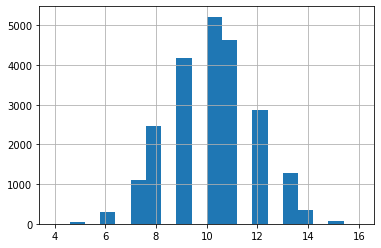

In [454]:
if calc_adherence:
    # I-MEDAS score
    category_thresholds = {
        'Fruits': ('>', 210, 'daily'),
        'Vegetables': ('>', 60, 'daily'),
        'Oilsandfats': ('<', 80, 'daily'),
        'fruitjuicesandsoftdrinks': ('<', 50, 'daily'),
        ('PastaGrainsandSidedishes_wholewheat', 'PastaGrainsandSidedishes', 'Bread_wholewheat', 'Bread'): ('>', 210, 'daily'),
        'milkcreamcheeseandyogurts': ('>', 180, 'daily'),
        'Beefveallambandothermeatproducts': ('<', 220, 'weekly'),
        'AlcoholicDrinks': ('>', 125, 'weekly'),
        'Pulsesandproducts': ('>', 72.85, 'weekly'),
        'Fishandseafood': ('>', 64.28, 'weekly'),
        'Nutsseedsandproducts': ('>', 77.14, 'weekly'),
        'MedOilandfats': ('>', 34.28, 'weekly'),
        'SweetsSnacksandBakedgoods': [
        ('<', 228.57, 'weekly'),
        ('<', 142.86, 'weekly'),
        ('<', 85.71, 'weekly'),
        ],
    }

    comparison_thresholds = {
        'Medoilandfats_vs_Oilsandfats': ('MedOilandfats', 'Oilsandfats'),
        'Poultry_vs_RedMeat': ('Poultryanditsproducts', 'Beefveallambandothermeatproducts'),
    }

    IMEDAS_score_per_day = get_diet_score(log_date, category_thresholds, metric='Energy', comparison_thresholds=comparison_thresholds)
    IMEDAS_score_per_day.hist(bins=20)

In [455]:
def reindex_to_all_days(df, log_date):
    return df.reindex(
        log_date.reset_index()[['RegistrationCode', 'Day']]
        .drop_duplicates()
        .set_index(['RegistrationCode', 'Day'])
        .index,
        fill_value=0
    )

def get_daily_mean(series):
    return series.groupby('RegistrationCode').transform('mean')

def map_score_linear(series, min_val, max_val):
    return ((series - min_val) / (max_val - min_val) * 10).clip(0, 10)

def get_proportional_nutrient_score(log_date, column, min_pct, max_pct):
    df = log_date.reset_index()
    grams = df.groupby(['RegistrationCode', 'Day'])[column].sum()
    kcal = df.groupby(['RegistrationCode', 'Day'])['Energy'].sum()
    pct = (grams * 9) * 100 / kcal
    return map_score_linear(pct, min_pct, max_pct).rename(f'{column}_score')

def get_sodium_decile_score(log_date, column='Sodium, Na'):
    df = log_date.reset_index()
    sodium = df.groupby(['RegistrationCode', 'Day'])[column].sum()
    decile_edges = np.nanpercentile(sodium, np.arange(0, 101, 10))
    deciles = pd.Series(np.digitize(sodium, decile_edges[1:-1], right=True) + 1, index=sodium.index)
    return (11 - deciles).clip(1,10).astype(int).rename('Sodium_score')

def get_proportional_score(log_date, subject_df, categories, threshold_by_sex, metric):
    df = log_date.reset_index()
    idx = df[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day']).index
    gender_map = subject_df.reset_index().drop_duplicates('RegistrationCode').set_index('RegistrationCode')['gender']

    if categories == ('AlcoholicDrinks',):
        alc = df[df['MainCategoryEng'] == 'AlcoholicDrinks'].copy()
        sizes = {'wine': 4*28.35, 'beer': 12*28.35, 'liquor': 1.5*28.35}
        def to_serv(row):
            name = row['shortname_eng'].lower()
            for k in sizes:
                if k in name: return row['weight'] / sizes[k]
            if any(x in name for x in ['campari','cocktail','gin','ouzo','vodka','whiskey']):
                return row['weight'] / sizes['liquor']
            return 0.0
        alc['serv'] = alc.apply(to_serv, axis=1)
        daily = reindex_to_all_days(alc.groupby(['RegistrationCode','Day'])['serv'].sum(), log_date)
        gender = daily.index.get_level_values('RegistrationCode').map(gender_map)

        def alcohol_score(v, g):
            if g == 0:  # woman
                if 0.5 <= v <= 1.5:
                    return 10
                elif v > 1.5 and v < 2.5:
                    return (2.5 - v) / (2.5 - 1.5) * 10
                elif v >= 2.5:
                    return 0
                else:  # v < 0.5
                    return (v / 0.5) * (10 - 2.5) + 2.5  # maps 0 → 2.5 and 0.5 → 10
            elif g == 1:  # man
                if 0.5 <= v <= 2.0:
                    return 10
                elif v > 2.0 and v < 3.5:
                    return (3.5 - v) / (3.5 - 2.0) * 10
                elif v >= 3.5:
                    return 0
                else:  # v < 0.5
                    return (v / 0.5) * (10 - 2.5) + 2.5  # maps 0 → 2.5 and 0.5 → 10

        return pd.Series([alcohol_score(v, g) for v, g in zip(daily.values, gender)], index=daily.index, name='AlcoholicDrinks_score')

    # General
    mask = df['MainCategoryEng'].isin(categories)
    daily = reindex_to_all_days(df[mask].groupby(['RegistrationCode','Day'])[metric].sum(), log_date)
    threshold_series = daily.index.get_level_values('RegistrationCode').map(gender_map).map(threshold_by_sex)
    return ((daily / threshold_series) * 10).clip(0,10).rename(f"{'_'.join(categories)}_score")


def get_vegtable_score(log_date):
    # 7. Vegetables (excluding potatoes)
    excluded_potatoes = {
        'French fries', 'Potato chips', 'Potato pancakes',
        'Potato pie', 'Potato salad', 'Potatoes'
    }

    # Filter vegetables excluding specific potato foods
    veg_mask = (log_date['MainCategoryEng'] == 'Vegetables') & (~log_date['shortname_eng'].isin(excluded_potatoes))
    veg_df = log_date[veg_mask].reset_index()

    # Compute daily energy from non-potato vegetables
    veg_energy = (
        veg_df.groupby(['RegistrationCode', 'Day'])['Energy']
        .sum()
    )
    veg_energy = reindex_to_all_days(veg_energy, log_date)

    # Map [0 kcal → 0] to [150 kcal+ → 10]
    veg_score = map_score_linear(veg_energy, 0, 150)
    veg_score.name = 'Vegetables_score'
    return veg_score



<AxesSubplot:>

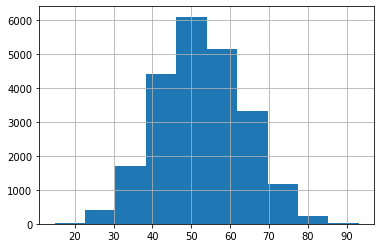

In [456]:
### alternate Healthy Eating Index (aHEI) scoring
# 1. Energy‐based proportional thresholds
energy_thresholds = {
    'fruitjuicesandsoftdrinks': ('proportional', (1 * 70, 0), 'daily'),
    'Fruits': ('proportional', (0, 280), 'daily'),
    ('Beefveallambandothermeatproducts', 'Proccessed meat products'): ('proportional', (1.5 * 220, 0), 'daily'),
}

energy_score = get_diet_score(
    log_date,
    energy_thresholds,
    metric='Energy',
    comparison_thresholds=None,
    special_cases=None
)


# 2. Weight‐based proportional threshold for Nuts & Legumes
weight_thresholds = {
        ('Pulsesandproducts','Nutsseedsandproducts'): ('proportional', (0, 28.35), 'daily'),
        'Fishandseafood': ('proportional', (0, 250), 'weekly'),
}

weight_score = get_diet_score(
    log_date,
    weight_thresholds,
    metric='weight',
    comparison_thresholds=None,
    special_cases=None
)

trans_score = get_proportional_nutrient_score(log_date, 'Fatty acids, total trans', 4.0, 0.5)
PUFA_score = get_proportional_nutrient_score(log_date, 'Fatty acids, total polyunsaturated', 2.0, 10.0)

sodium_score = get_sodium_decile_score(log_date)

wg_score = get_proportional_score(log_date, subjects_df, ('PastaGrainsandSidedishes_wholewheat','Bread_wholewheat'), {0: 75, 1: 90}, metric='weight')
alc_score = get_proportional_score(log_date, subjects_df, ('AlcoholicDrinks',), {0:(1.5,2.5), 1:(2.0,3.5)}, metric='weight')

veg_score = get_vegtable_score(log_date)

# Combine
aHEI_score_per_day = energy_score + weight_score + trans_score + PUFA_score + sodium_score + wg_score + alc_score + veg_score
aHEI_score_per_day.hist()


In [457]:
def get_hPDI_score(log_date, positive_categories, negative_categories):
    import pandas as pd

    total_scores = []

    # Special definitions
    canned_fruit_names = set([
        'Prune', 'Apricot', 'Dates', 'Jam', 'Lemon juice',
        'Dried pineapple', 'Dried apple',
        'Dried cranberries', 'Dried Fruit', 'Dried fig',
        'Goji berry', 'Dried Mango', 'Cherries'
    ])
    potato_foods = set([
        'French fries', 'Potato chips', 'Potato pancakes', 'Potato pie',
        'Potato salad', 'Potatoes'
    ])
    fruit_juices = set([
        'Pomegranate juice', 'Orange juice', 'Carrot Juice', 'Lemon juice',
        'Apple juice', 'Grapefruit juice'
    ])
    soft_drinks = set([
        'Coke', 'Lemonade', 'Smoothies', 'Diet Coke', 'Sweetened Cocoa Powder',
        'Flavored Waters', 'Fruit Drink', 'Cocktail', 'Malt beverage',
        'Coffee', 'Tea'
    ])
    butter_name = 'Butter'

    # Create a uniform index of all person-days
    idx = (
        log_date
        .reset_index()[['RegistrationCode', 'Day']]
        .drop_duplicates()
        .set_index(['RegistrationCode', 'Day'])
        .index
    )

    # Helper function for scoring
    def compute_score(filtered_log_date, label, reverse=False):
        category_energy = (
            filtered_log_date
            .groupby(['RegistrationCode', 'Day'])['Energy']
            .sum()
            .reindex(idx, fill_value=0)
        )

        category_energy = category_energy.groupby('RegistrationCode').mean()

        try:
            scores = pd.qcut(category_energy, 5, labels=[1, 2, 3, 4, 5])
            scores = scores.astype(int)
            if reverse:
                scores = 6 - scores
        except ValueError:
            zero_mask = category_energy == 0
            non_zero = category_energy[~zero_mask]

            if len(non_zero) == 0:
                fallback_score = 1 if not reverse else 5
                scores = pd.Series(fallback_score, index=category_energy.index)
            else:
                labels = [5, 4, 3, 2] if reverse else [2, 3, 4, 5]
                non_zero_scores = pd.qcut(non_zero, 4, labels=labels)
                non_zero_scores = non_zero_scores.astype(int)

                scores = pd.Series(1 if not reverse else 5, index=category_energy.index)
                scores.update(non_zero_scores)

        scores.name = f'{label}_score'
        total_scores.append(scores)

    # --- Category scoring ---
    for category_group, reverse in [(positive_categories, False), (negative_categories, True)]:
        for category in category_group:
            if isinstance(category, tuple):
                filtered_log_date = log_date[log_date['MainCategoryEng'].isin(category)]
                category_name = "_".join(category)
            else:
                filtered_log_date = log_date[log_date['MainCategoryEng'] == category]
                category_name = category

            compute_score(filtered_log_date, category_name, reverse)

    # --- Special case 1: Fruits + canned fruits ---
    fruits = log_date[log_date['MainCategoryEng'] == 'Fruits']
    canned_fruits = log_date[
        (log_date['MainCategoryEng'] == 'Cannedvegandfruits') &
        (log_date['shortname_eng'].isin(canned_fruit_names))
    ]
    combined_fruits = pd.concat([fruits, canned_fruits])
    compute_score(combined_fruits, 'Fruits_and_Canned', reverse=False)

    # --- Special case 2: Vegetables excluding potatoes ---
    veg = log_date[log_date['MainCategoryEng'] == 'Vegetables']
    veg_no_potato = veg[~veg['shortname_eng'].isin(potato_foods)]
    compute_score(veg_no_potato, 'Vegetables_no_potatoes', reverse=False)

    # --- Special case 3: Fruit juices ---
    fruit_juice_log = log_date[
        (log_date['MainCategoryEng'] == 'fruitjuicesandsoftdrinks') &
        (log_date['shortname_eng'].isin(fruit_juices))
    ]
    compute_score(fruit_juice_log, 'FruitJuices', reverse=True)

    # --- Special case 4: Soft drinks ---
    soft_drink_log = log_date[
        (log_date['MainCategoryEng'] == 'fruitjuicesandsoftdrinks') &
        (log_date['shortname_eng'].isin(soft_drinks))
    ]
    compute_score(soft_drink_log, 'SoftDrinks', reverse=True)

    # --- Special case 5: Potato foods ---
    potato_log = log_date[log_date['shortname_eng'].isin(potato_foods)]
    compute_score(potato_log, 'PotatoFoods', reverse=True)

    # --- Special case 6: Butter ---
    butter_log = log_date[log_date['shortname_eng'] == butter_name]
    compute_score(butter_log, 'Butter', reverse=True)

    # --- Combine ---
    if total_scores:
        all_scores = pd.concat(total_scores, axis=1)
        scores_per_day = all_scores.sum(axis=1).reset_index(name='scores_per_day')
    else:
        scores_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()
        scores_per_day['scores_per_day'] = 0

    scores_per_day = scores_per_day.set_index('RegistrationCode')
    return scores_per_day


array([[<AxesSubplot:title={'center':'scores_per_day'}>]], dtype=object)

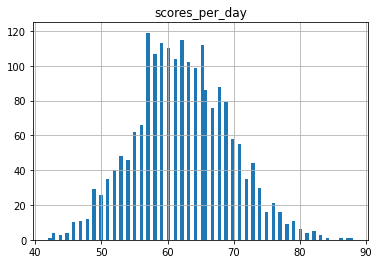

In [458]:
positive_categories = ['Nutsseedsandproducts', ('PastaGrainsandSidedishes_wholewheat','Bread_wholewheat'), 'Pulsesandproducts', 'MedOilandfats', 'Drinks']
negative_categories = [('sweets', 'Snacks', 'bakedgoods'), 'Fishandseafood', 'Beefveallambandothermeatproducts', 'Poultryanditsproducts', ('PastaGrainsandSidedishes','Bread'), 'Eggsandtheirproducts', ('Hardcheese', 'milkcreamcheeseandyogurts', 'sweetmilkproducts')]

hPDI_score_per_day = get_hPDI_score(log_date, positive_categories, negative_categories)
hPDI_score_per_day.hist(bins=90)

In [459]:
# Used once to create diet adherence foods csv:

# # Ensure all foods in WFPB are included in Vegan and Vegetarian
# for col in diet_foods_df.columns:
#     # Check if WFPB is 1 but Vegan or Vegetarian is 0
#     if diet_foods_df.loc["WFPB", col] == 1:
#         if diet_foods_df.loc["Vegan", col] == 0:
#             diet_foods_df.loc["Vegan", col] = 1  # Fill Vegan with 1
#             print(f"Fixed: {col} - WFPB is 1 but Vegan was 0.")
#         if diet_foods_df.loc["Vegetarian", col] == 0:
#             diet_foods_df.loc["Vegetarian", col] = 1  # Fill Vegetarian with 1
#             print(f"Fixed: {col} - WFPB is 1 but Vegetarian was 0.")
    
#     # Check if Vegan is 1 but Vegetarian is 0
#     if diet_foods_df.loc["Vegan", col] == 1 and diet_foods_df.loc["Vegetarian", col] == 0:
#         diet_foods_df.loc["Vegetarian", col] = 1  # Fill Vegetarian with 1
#         print(f"Fixed: {col} - Vegan is 1 but Vegetarian was 0.")

# diet_foods_df

In [460]:
# Used once to create diet adherence foods csv:
# diet_foods_df.to_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_foods.csv')

In [461]:
diet_foods_df = pd.read_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_foods.csv', index_col=0)
# diet_foods_df = diet_foods_df.loc[:,diet_foods_df.columns.isin(log_date['shortname_eng'].unique())]
diet_foods_df = diet_foods_df.loc[:,diet_foods_df.columns.isin(food_shortnames)]
diet_foods_df

,Chocolate Cookies,Honey,Cappuccino,Cottage cheese,Tomatoes,Oatmeal Cereal,Apple,Banana,Peach,Rye Bread,...,Coated Biscuits,Avocado Sandwich,Pickled Chili pepper,Kif Kef,Egg Roll,Mekupelet,Apropo,Sweet Potato Pie,Cocktail,Salmon Sandwich
Mediterranean,0,1,1,1,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Paleo,0,1,0,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
WFPB,0,0,0,0,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Vegan,0,0,0,0,1,1,1,1,1,1,...,0,1,1,0,0,0,1,1,1,0
Vegetarian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
Pescatarian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Carnivore,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOVA,4,2,3,3,1,3,1,1,1,4,...,4,4,3,4,3,4,4,3,3,4
Tubers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Pork,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
# # # Add NOVA scores
# # Step 1: Calculate the mean Score for each food (shortname_eng)
# mean_scores = log_date.groupby('shortname_eng')['Score'].mean()

# # Step 2: Create a dictionary mapping shortname_eng to its mean Score
# score_dict = mean_scores.round().astype('Int64').to_dict()

# # Step 3: Prepare the new row with mean Scores for each food column in diet_foods_df
# new_row = {col: score_dict.get(col, None) for col in diet_foods_df.columns}

# # Step 4: Add the new row labeled as "NOVA"
# diet_foods_df.loc["NOVA"] = pd.Series(new_row)



In [463]:
# # Step 1: Identify foods with NOVA score of 4
# nova_4_foods = diet_foods_df.loc['NOVA'][diet_foods_df.loc['NOVA'] == 4].index

# # Step 2: Filter out Vegan and Vegetarian diets
# diets_excluding_vegan_veg = diet_foods_df.loc[~diet_foods_df.index.isin(['Vegan', 'Vegetarian', 'Pescatarian'])]

# # Step 3: Check if any of these diets have a score of 1 for the NOVA 4 foods
# foods_with_1_in_other_diets = diets_excluding_vegan_veg[nova_4_foods].apply(lambda col: (col == 1).any(), axis=0)

# # Step 4: Get the final list of foods
# resulting_foods = foods_with_1_in_other_diets[foods_with_1_in_other_diets].index.tolist()

# # Output the results
# print(resulting_foods)


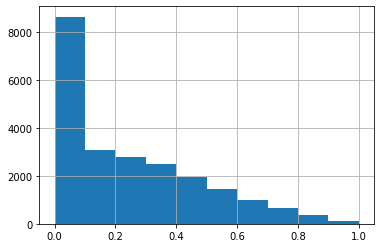

In [464]:
if calc_adherence:

    # Define thresholds for base and moderation foods
    base_food_thresholds = {
        'Vegetables': 100,
        'Fruits': 100,
        ('PastaGrainsandSidedishes_wholewheat', 'Bread_wholewheat'): 0.05,  # Shared threshold for whole grains
        'Pulsesandproducts': 0.05,
        'Nutsseedsandproducts': 0.05,
    }
    moderation_food_thresholds = {}

    wfpb_diet_foods = diet_foods_df.columns[diet_foods_df.loc["WFPB"] == 1].tolist()

    wfpb_score_per_day = get_diet_pattern_calories(log_date, wfpb_diet_foods, base_food_thresholds, moderation_food_thresholds)
    wfpb_score_per_day.hist()

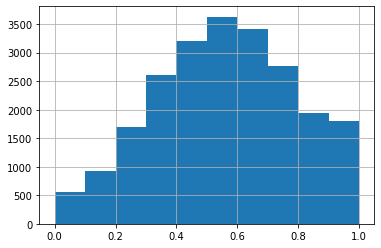

In [465]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    vegan_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Vegan"] == 1].tolist()

    vegan_score_per_day = get_diet_pattern_calories(log_date, vegan_diet_foods, base_food_thresholds, moderation_food_thresholds)
    vegan_score_per_day.hist()

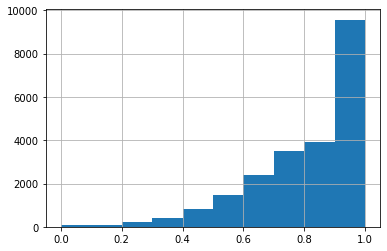

In [466]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    vegetarian_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Vegetarian"] == 1].tolist()

    vegetarian_score_per_day = get_diet_pattern_calories(log_date, vegetarian_diet_foods, base_food_thresholds, moderation_food_thresholds)
    vegetarian_score_per_day.hist()

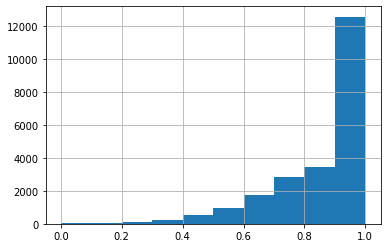

In [467]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    pescatarian_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Pescatarian"] == 1].tolist()

    pescatarian_score_per_day = get_diet_pattern_calories(log_date, pescatarian_diet_foods, base_food_thresholds, moderation_food_thresholds)
    pescatarian_score_per_day.hist()

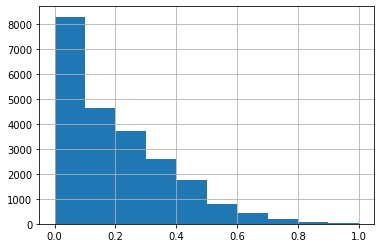

In [468]:
if calc_adherence:
    
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {
        ('Hardcheese', 'milkcreamcheeseandyogurts'): 0.5,
        #'Carbohydrate, by difference': 0.2,
    }

    carnivore_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Carnivore"] == 1].tolist()

    carnivore_score_per_day = get_diet_pattern_calories(log_date, carnivore_diet_foods, base_food_thresholds, moderation_food_thresholds)
    carnivore_score_per_day.hist()

['Chocolate Cookies', 'Rye Bread', 'Mayonnaise', 'Ice cream', 'Brownies', 'Chocolate', 'Flavored Yogurt', 'emmer wheat bread', 'Pastrami', 'Yellow Cheese Sandwich', 'Rugelach', 'Coke', 'Bissli', 'Energy bar', 'Cold cut', 'Salty Cookies', 'Pretzels', 'Ketchup', 'Danish', 'Wholemeal Bread', 'Sausages', 'Dark Chocolate', 'Corn casserole', 'Rice crackers', 'Protein bar', 'Diet Cheesecake', 'Sweetened White Cheese', 'Chocolate spread', 'Popcorn', 'Pesek Zman snack', 'Soy Pudding', 'Pasta With Cheese', 'Wholemeal Pita', 'Gumdrops', 'Chocolate cake', 'Tuna Sandwich', 'Wholemeal Crackers', 'Smoothies', 'Granola', 'Matzo', 'Omelet sandwich', 'Burekas', 'Baguette', 'Flavored Waters', 'Wholemeal Roll', 'Orange Cake', 'Gluten free bread', 'Hamantaschen', 'Cereal Bar', 'Wafers', 'Cracker', 'Popsicle', 'Honey Cake', 'Sugar', 'Onion Rings', 'Cheese Pastry', 'Broth', 'Biscuit', 'Bamba', 'Cereals', 'Tuna Salad', 'Apple Cake', 'Sabih Sandwich', 'Croissant', 'Jachnun', 'Sweet Challah', 'Sugar substitute'

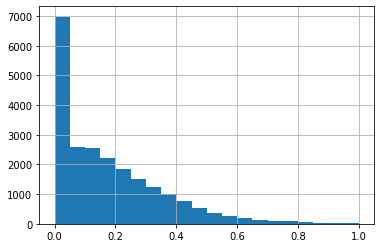

In [469]:
if calc_adherence:
    
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    NOVA_4_foods = diet_foods_df.columns[diet_foods_df.loc["NOVA"] == 4].tolist()
    print(NOVA_4_foods)

    pct_NOVA_4 = get_diet_pattern_calories(log_date, NOVA_4_foods, base_food_thresholds, moderation_food_thresholds)
    pct_NOVA_4.hist(bins=20)

In [470]:
log_date['MainCategoryEng'].unique()

array(['Drinks', 'milkcreamcheeseandyogurts', 'Eggsandtheirproducts',
       'Nutsseedsandproducts', 'sweets', 'Fishandseafood', 'Fruits',
       'Vegetables', 'MedOilandfats', 'Bread_wholewheat',
       'Pulsesandproducts', 'Bread', 'Soupsandsauces', 'Cereals',
       'PastaGrainsandSidedishes', 'Cannedvegandfruits', 'Hardcheese',
       'Poultryanditsproducts', 'AlcoholicDrinks',
       'Beefveallambandothermeatproducts', 'fruitjuicesandsoftdrinks',
       'Spicesandherbs', nan, 'sweetmilkproducts', 'Snacks', 'bakedgoods',
       'FastFoods', 'PastaGrainsandSidedishes_wholewheat', 'Oilsandfats',
       'Proccessedmeatproducts', 'Others', 'Lowcaloriesanddietdrinks',
       'Deepfriedfoods', 'Industrializedvegetarianfoodreadytoeat'],
      dtype=object)

In [471]:
log_date.head()

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1007599726   2023-08-06 1006814  06:00     6.0       3       NaN   NaN   
                            1008880  06:00    60.0       2       NaN   NaN   
                            1012989  06:00    49.0      41       NaN   NaN   
                            1006814  09:07     6.0       3       NaN   NaN   
                            1008880  09:07    60.0       2       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00  0.000005       8.197527e-07   
                            1008880  06:00  0.001317       1.371037e-03   
                            1012989  06:00  0.004104       3.846075e-03   
                            1006814  09:07  0.000005       8.197527e-07   
                            1008880  09:07  0.001317       1.371037e-03   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1007599726   2023-08-06 1006814  06:00                     0.000000   
                            1008880  06:00                     0.001933   
                            1012989  06:00                     0.000335   
                            1006814  09:07                     0.000000   
                            1008880  09:07                     0.001933   

                                            Energy  Alcohol, ethyl     Water  \
RegistrationCode Day        food_id Hour                                       
10K_1007599726   2023-08-06 1006814  06:00    0.06             0.0  0.004074   
                            1008880  06:00   37.05             0.0  0.036074   
                            1012989  06:00   77.42             0.0  0.024862   
                            1006814  09:07    0.06             0.0  0.004074   
                            1008880  09:07   37.05             0.0  0.036074   

                                            ...               MainCategoryHeb  \
RegistrationCode Day        food_id Hour    ...                                 
10K_1007599726   2023-08-06 1006814  06:00  ...  משקאות - קפה, תה, לא ממותקים   
                            1008880  06:00  ...    חלב, גבינות רכות ויוגורטים   
                            1012989  06:00  ...                ביצים ומוצריהן   
                            1006814  09:07  ...  משקאות - קפה, תה, לא ממותקים   
                            1008880  09:07  ...    חלב, גבינות רכות ויוגורטים   

                                                      MainCategoryEng  \
RegistrationCode Day        food_id Hour                                
10K_1007599726   2023-08-06 1006814  06:00                     Drinks   
                            1008880  06:00  milkcreamcheeseandyogurts   
                            1012989  06:00       Eggsandtheirproducts   
                            1006814  09:07                     Drinks   
                            1008880  09:07  milkcreamcheeseandyogurts   

                                            ParentCategory  NOVA_score  \
RegistrationCode Day        food_id Hour                                 
10K_1007599726   2023-08-06 1006814  06:00          משקאות         1.0   
                            1008880  06:00     חלב ומוצריו         1.0   
                            1012989  06:00             NaN         1.0   
                            1006814  09:07          משקאות         1.0   
                            1008880  09:07     חלב ומוצריו         1.0   

                                            total_energy_per_day  is_plant  \
RegistrationCode Day        food_id Hour                                     
10K_1007599726   2023-08-06 1006814  06:00           1463.855996         1   
                            1008880  06:00         

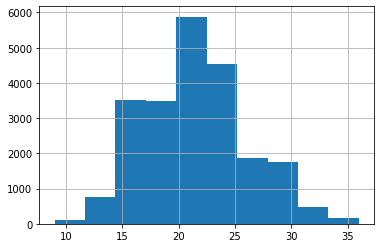

In [472]:
if calc_adherence:
    # eat-LANCET score
    category_thresholds = {
        'Vegetables': [('>', 300, 'weekly'), ('>', 200, 'weekly'), ('>', 100, 'weekly')],
        'Fruits': [('>', 50, 'weekly'), ('>', 100, 'weekly'), ('>', 200, 'weekly')],
        'MedOilandfats': [('>', 10, 'weekly'), ('>', 20, 'weekly'), ('>', 40, 'weekly')],
        'Pulsesandproducts': [('>', 18.75, 'weekly'), ('>', 37.5, 'weekly'), ('>', 75, 'weekly')],
        'Nutsseedsandproducts': [('>', 12.5, 'weekly'), ('>', 25, 'weekly'), ('>', 50, 'weekly')],
        ('PastaGrainsandSidedishes_wholewheat', 'Bread_wholewheat'): [('>', 58, 'weekly'), ('>', 116, 'weekly'), ('>', 232, 'weekly')],
        'Fishandseafood': [('>', 7, 'weekly'), ('>', 14, 'weekly'), ('>', 28, 'weekly')],
        'Beefveallambandothermeatproducts': [('<', 7, 'weekly'), ('<', 14, 'weekly'), ('<', 28, 'weekly')],
        'Pork': [('<', 7, 'weekly'), ('<', 14, 'weekly'), ('<', 28, 'weekly')],
        'Poultryanditsproducts': [('<', 29, 'weekly'), ('<', 58, 'weekly'), ('<', 116, 'weekly')],
        'Eggsandtheirproducts': [('<', 13, 'weekly'), ('<', 25, 'weekly'), ('<', 50, 'weekly')],
        ('milkcreamcheeseandyogurts', 'Hardcheese'): [('<', 13, 'weekly'), ('<', 25, 'weekly'), ('<', 50, 'weekly')],
        'Tubers': [('<', 50, 'weekly'), ('<', 100, 'weekly'), ('<', 200, 'weekly')],
    }

    comparison_thresholds = None

    special_cases = {
        'added_sugars': {
            'filter': (log_date['NOVA_score'] == 4),
            'column': 'Sugars, Total',
            'thresholds': [('<', 124), ('<', 62), ('<', 31)]
            }
        }

    ### Modify the log_date DataFrame to match the LANCET requirements
    log_date_lancet = log_date.copy()
    # Returning the nutrient columns to g instead of g/(energy per day)
    log_date_lancet[nutr_list_no_energy] = log_date_lancet[nutr_list_no_energy].mul(log_date_lancet['total_energy_per_day'], axis=0)
    tubers = diet_foods_df.columns[diet_foods_df.loc["Tubers"] == 1].tolist()
    pork = diet_foods_df.columns[diet_foods_df.loc["Pork"] == 1].tolist()
    log_date_lancet.loc[log_date_lancet["shortname_eng"].isin(tubers), "MainCategoryEng"] = "Tubers"
    log_date_lancet.loc[log_date_lancet["shortname_eng"].isin(pork), "MainCategoryEng"] = "Pork"

    eatLANCET_score_per_day = get_diet_score(log_date_lancet, category_thresholds, metric='weight',comparison_thresholds=comparison_thresholds, special_cases=special_cases)
    eatLANCET_score_per_day.hist()

In [473]:
if calc_adherence:
    # Concatenate the Series into a DataFrame
    # df = pd.concat([med_score_per_day, paleo_score_per_day, vegetarian_score_per_day, wfpb_score_per_day, vegan_score_per_day, pescatarian_score_per_day, carnivore_score_per_day], axis=1)
    # df.columns = ['med_score_per_day', 'paleo_score_per_day', 'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 'pescatarian_score_per_day', 'carnivore_score_per_day']
    df = pd.concat([vegetarian_score_per_day, wfpb_score_per_day, vegan_score_per_day, pescatarian_score_per_day, carnivore_score_per_day, pct_NOVA_4, IMEDAS_score_per_day, eatLANCET_score_per_day, aHEI_score_per_day], axis=1)
    df.columns = ['vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 'pescatarian_score_per_day', 'carnivore_score_per_day', 'NOVA_pct', 'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day']

    # Save the DataFrame to a CSV file
    if stage == 'baseline':
        df.to_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores.csv', index=True)
    if stage != 'baseline':
        df.to_csv(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores_{stage_suf}.csv', index=True)

# Reload the DataFrame from the CSV file
if stage == 'baseline':
    diet_adherence_scores = pd.read_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores.csv', index_col=[0,1])
if stage != 'baseline':
    diet_adherence_scores = pd.read_csv(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores_{stage_suf}.csv', index_col=[0,1])

# Display the reloaded DataFrame
diet_adherence_scores

vegetarian_score_per_day  wfpb_score_per_day  \
RegistrationCode Day                                                        
10K_1007599726   2023-08-06                  0.714453            0.239412   
                 2023-08-07                  0.477030            0.000000   
                 2023-08-08                  1.000000            0.074556   
10K_1012020971   2023-05-10                  1.000000            0.354113   
                 2023-05-11                  1.000000            0.409877   
...                                               ...                 ...   
10K_9984191583   2023-12-08                  0.803697            0.237792   
                 2023-12-09                  0.487950            0.171378   
                 2023-12-10                  1.000000            0.464457   
                 2023-12-11                  0.764614            0.269495   
                 2023-12-12                  0.595097            0.166043   

                             vegan_score_per_day  pescatarian_score_per_day  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.407725                   1.000000   
                 2023-08-07             0.074226                   1.000000   
                 2023-08-08             0.276490                   1.000000   
10K_1012020971   2023-05-10             0.717604                   1.000000   
                 2023-05-11             0.931442                   1.000000   
...                                          ...                        ...   
10K_9984191583   2023-12-08             0.503672                   0.803697   
                 2023-12-09             0.429710                   0.487950   
                 2023-12-10             0.614457                   1.000000   
                 2023-12-11             0.437467                   0.764614   
                 2023-12-12             0.452823                   0.710036   

                             carnivore_score_per_day  NOVA_pct  \
RegistrationCode Day                                             
10K_1007599726   2023-08-06                 0.404015  0.061711   
                 2023-08-07                 0.709295  0.097058   
                 2023-08-08                 0.157549  0.000000   
10K_1012020971   2023-05-10                 0.004122  0.411678   
                 2023-05-11                 0.068558  0.354705   
...                                              ...       ...   
10K_9984191583   2023-12-08                 0.196303  0.000000   
                 2023-12-09                 0.512050  0.173332   
                 2023-12-10                 0.145839  0.000000   
                 2023-12-11                 0.502465  0.000000   
                 2023-12-12                 0.457817  0.091088   

                             IMEDAS_score_per_day  eatLANCET_score_per_day  \
RegistrationCode Day                                                         
10K_1007599726   2023-08-06                   9.0                     20.0   
                 2023-08-07                   8.0                     20.0   
                 2023-08-08                   8.0                     20.0   
10K_1012020971   2023-05-10                  13.0                     26.0   
                 2023-05-11                  13.0                     26.0   
...                                           ...                      ...   
10K_9984191583   2023-12-08                  10.0                     20.0   
                 2023-12-09                   9.0                     20.0   
                 2023-12-10                  11.0                     20.0   
                 2023-12-11                  10.0                     20.0   
                 2023-12-12                  10.0                     20.0   

                             aHEI_score_per_day  
RegistrationCode Day                             
10K_1007599726   2023-08-

In [474]:
temp = log_date_reset.copy()
temp['hh'] = temp['Hour'].str[0:3]
temp['mm'] = temp['Hour'].str[4:]
temp['Hour'] = temp['hh'].astype(int) * 60 + temp['mm'].astype(int)

grouped = temp.groupby(['RegistrationCode', 'Day'])['Hour']
eating_window_min = grouped.min()
eating_window_max = grouped.max()
eating_window = eating_window_max - eating_window_min
fasting_window = 1440 - eating_window
fasting_window = fasting_window / 60
fasting_window.index = fasting_window.index.set_levels([
    fasting_window.index.levels[0],  # Keep RegistrationCode as is
    fasting_window.index.levels[1].astype(str)  # Convert Day to object
])
fasting_window

RegistrationCode  Day       
10K_1007599726    2023-08-06    10.883333
                  2023-08-07    15.733333
                  2023-08-08    17.083333
10K_1012020971    2023-05-10    12.000000
                  2023-05-11    13.500000
                                  ...    
10K_9984191583    2023-12-08    15.366667
                  2023-12-09    17.666667
                  2023-12-10    17.216667
                  2023-12-11    14.516667
                  2023-12-12    14.166667
Name: Hour, Length: 22535, dtype: float64

In [475]:
# log_date.to_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_date_{stage}.pkl")

## Group by Days

In [476]:
log_day = log_date.groupby(['RegistrationCode', 'Day'])[nutr_list].sum()
log_day = log_day[log_day['Energy']>500]
log_day = log_day[log_day['Energy']<4000]
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1007599726   2023-08-06  0.047501           0.051135   
                 2023-08-07  0.070019           0.060533   
                 2023-08-08  0.054364           0.049575   
10K_1012020971   2023-05-10  0.031672           0.039116   
                 2023-05-11  0.036977           0.034994   
...                               ...                ...   
10K_9984191583   2023-12-08  0.049935           0.060855   
                 2023-12-09  0.059233           0.046333   
                 2023-12-10  0.036404           0.057094   
                 2023-12-11  0.076796           0.039044   
                 2023-12-12  0.058833           0.059261   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1007599726   2023-08-06                     0.090124  1463.855996   
                 2023-08-07                     0.041063   930.740996   
                 2023-08-08                     0.084087   609.334999   
10K_1012020971   2023-05-10                     0.136318  1474.842500   
                 2023-05-11                     0.141525  1907.051010   
...                                                  ...          ...   
10K_9984191583   2023-12-08                     0.065242  1450.549866   
                 2023-12-09                     0.082940   923.086656   
                 2023-12-10                     0.091087  1095.519999   
                 2023-12-11                     0.085452   759.137137   
                 2023-12-12                     0.057403  1481.650000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.0  0.573928              0.007671   
                 2023-08-07             0.0  0.537986              0.003488   
                 2023-08-08             0.0  1.244299              0.008543   
10K_1012020971   2023-05-10             0.0  0.681353              0.022232   
                 2023-05-11             0.0  0.813369              0.024077   
...                                     ...       ...                   ...   
10K_9984191583   2023-12-08             0.0  0.673915              0.010589   
                 2023-12-09             0.0  0.821839              0.012172   
                 2023-12-10             0.0  1.095629              0.019397   
                 2023-12-11             0.0  1.125073              0.008185   
                 2023-12-12             0.0  0.684138              0.010171   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1007599726   2023-08-06     0.445333  0.004065       0.180237  ...   
                 2023-08-07     0.516887  0.003962       0.158213  ...   
                 2023-08-08     0.997335  0.004959       0.243047  ...   
10K_1012020971   2023-05-10     0.299447  0.010587       0.213477  ...   
                 2023-05-11     0.403034  0.011662       0.203815  ...   
...                                  ...       ...            ...  ...   
10K_9984191583   2023-12-08     0.373792  0.007568       0.249258  ...   
                 2023-12-09     0.326239  0.004559       0.198996  ...   
                 2023-12-10     0.517852  0.007519       0.197380  ...   
                 2023-12-11     0.957779  0.004131       0.248763  ...   
                 2023-12-12     0.514396  0.005802       0.164966  ...   

                             Campesterol  Fluoride, F   Glucose  \
RegistrationCode Day                                              
10K_1007599726   2023-08-06     0.012321     0.067789  0.010988   
                 2023-08-07     0.031538     0.128808  0.002297   
                 2023-08-08     0.070881

In [477]:
len(set(log_day.index.get_level_values('RegistrationCode')))

2024

In [478]:
fasting_window.reindex(log_day.index)

RegistrationCode  Day       
10K_1007599726    2023-08-06    10.883333
                  2023-08-07    15.733333
                  2023-08-08    17.083333
10K_1012020971    2023-05-10    12.000000
                  2023-05-11    13.500000
                                  ...    
10K_9984191583    2023-12-08    15.366667
                  2023-12-09    17.666667
                  2023-12-10    17.216667
                  2023-12-11    14.516667
                  2023-12-12    14.166667
Name: Hour, Length: 22535, dtype: float64

In [479]:
log_day["Foods_per_meal"] = foods_per_meal
log_day["Foods_per_day"] = foods_per_day
log_day["Meals_per_day"] = meals_per_day
log_day['Fasting_window'] = fasting_window
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1007599726   2023-08-06  0.047501           0.051135   
                 2023-08-07  0.070019           0.060533   
                 2023-08-08  0.054364           0.049575   
10K_1012020971   2023-05-10  0.031672           0.039116   
                 2023-05-11  0.036977           0.034994   
...                               ...                ...   
10K_9984191583   2023-12-08  0.049935           0.060855   
                 2023-12-09  0.059233           0.046333   
                 2023-12-10  0.036404           0.057094   
                 2023-12-11  0.076796           0.039044   
                 2023-12-12  0.058833           0.059261   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1007599726   2023-08-06                     0.090124  1463.855996   
                 2023-08-07                     0.041063   930.740996   
                 2023-08-08                     0.084087   609.334999   
10K_1012020971   2023-05-10                     0.136318  1474.842500   
                 2023-05-11                     0.141525  1907.051010   
...                                                  ...          ...   
10K_9984191583   2023-12-08                     0.065242  1450.549866   
                 2023-12-09                     0.082940   923.086656   
                 2023-12-10                     0.091087  1095.519999   
                 2023-12-11                     0.085452   759.137137   
                 2023-12-12                     0.057403  1481.650000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.0  0.573928              0.007671   
                 2023-08-07             0.0  0.537986              0.003488   
                 2023-08-08             0.0  1.244299              0.008543   
10K_1012020971   2023-05-10             0.0  0.681353              0.022232   
                 2023-05-11             0.0  0.813369              0.024077   
...                                     ...       ...                   ...   
10K_9984191583   2023-12-08             0.0  0.673915              0.010589   
                 2023-12-09             0.0  0.821839              0.012172   
                 2023-12-10             0.0  1.095629              0.019397   
                 2023-12-11             0.0  1.125073              0.008185   
                 2023-12-12             0.0  0.684138              0.010171   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1007599726   2023-08-06     0.445333  0.004065       0.180237  ...   
                 2023-08-07     0.516887  0.003962       0.158213  ...   
                 2023-08-08     0.997335  0.004959       0.243047  ...   
10K_1012020971   2023-05-10     0.299447  0.010587       0.213477  ...   
                 2023-05-11     0.403034  0.011662       0.203815  ...   
...                                  ...       ...            ...  ...   
10K_9984191583   2023-12-08     0.373792  0.007568       0.249258  ...   
                 2023-12-09     0.326239  0.004559       0.198996  ...   
                 2023-12-10     0.517852  0.007519       0.197380  ...   
                 2023-12-11     0.957779  0.004131       0.248763  ...   
                 2023-12-12     0.514396  0.005802       0.164966  ...   

                             Lycopene  Phytosterols    Starch   omega_6  \
RegistrationCode Day                                                      
10K_1007599726   2023-08-06  0.000000      0.215089  0.010690  0.005032   
                 2023-08-07  0.000113      0.294540  0.003621  0.006836   
        

In [480]:
# Convert indices to strings if they aren't already
log_day.index = log_day.index.set_levels([log_day.index.levels[0].astype(str), log_day.index.levels[1]])
plant_foods_per_day.index = plant_foods_per_day.index.set_levels([plant_foods_per_day.index.levels[0].astype(str), plant_foods_per_day.index.levels[1]])
plant_foods_per_week.index = plant_foods_per_week.index.set_levels([plant_foods_per_week.index.levels[0].astype(str), plant_foods_per_week.index.levels[1]])


In [481]:
log_day["plant_foods_per_day"] = plant_foods_per_day
log_day["plant_foods_per_week"] = plant_foods_per_week
log_day["plant_energy_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_energy_pct'].first()
log_day["plant_protein_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_protein_pct'].first()
log_day["plant_fat_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_fat_pct'].first()
log_day = log_day.dropna()
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1007599726   2023-08-06  0.047501           0.051135   
                 2023-08-07  0.070019           0.060533   
                 2023-08-08  0.054364           0.049575   
10K_1012020971   2023-05-10  0.031672           0.039116   
                 2023-05-11  0.036977           0.034994   
...                               ...                ...   
10K_9984191583   2023-12-08  0.049935           0.060855   
                 2023-12-09  0.059233           0.046333   
                 2023-12-10  0.036404           0.057094   
                 2023-12-11  0.076796           0.039044   
                 2023-12-12  0.058833           0.059261   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1007599726   2023-08-06                     0.090124  1463.855996   
                 2023-08-07                     0.041063   930.740996   
                 2023-08-08                     0.084087   609.334999   
10K_1012020971   2023-05-10                     0.136318  1474.842500   
                 2023-05-11                     0.141525  1907.051010   
...                                                  ...          ...   
10K_9984191583   2023-12-08                     0.065242  1450.549866   
                 2023-12-09                     0.082940   923.086656   
                 2023-12-10                     0.091087  1095.519999   
                 2023-12-11                     0.085452   759.137137   
                 2023-12-12                     0.057403  1481.650000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.0  0.573928              0.007671   
                 2023-08-07             0.0  0.537986              0.003488   
                 2023-08-08             0.0  1.244299              0.008543   
10K_1012020971   2023-05-10             0.0  0.681353              0.022232   
                 2023-05-11             0.0  0.813369              0.024077   
...                                     ...       ...                   ...   
10K_9984191583   2023-12-08             0.0  0.673915              0.010589   
                 2023-12-09             0.0  0.821839              0.012172   
                 2023-12-10             0.0  1.095629              0.019397   
                 2023-12-11             0.0  1.125073              0.008185   
                 2023-12-12             0.0  0.684138              0.010171   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1007599726   2023-08-06     0.445333  0.004065       0.180237  ...   
                 2023-08-07     0.516887  0.003962       0.158213  ...   
                 2023-08-08     0.997335  0.004959       0.243047  ...   
10K_1012020971   2023-05-10     0.299447  0.010587       0.213477  ...   
                 2023-05-11     0.403034  0.011662       0.203815  ...   
...                                  ...       ...            ...  ...   
10K_9984191583   2023-12-08     0.373792  0.007568       0.249258  ...   
                 2023-12-09     0.326239  0.004559       0.198996  ...   
                 2023-12-10     0.517852  0.007519       0.197380  ...   
                 2023-12-11     0.957779  0.004131       0.248763  ...   
                 2023-12-12     0.514396  0.005802       0.164966  ...   

                             vitamin_E  Foods_per_meal  Foods_per_day  \
RegistrationCode Day                                                    
10K_1007599726   2023-08-06   0.008231        2.714286             10   
                 2023-08-07   0.014765        2.800000              9   
                

In [482]:
diet_adherence_scores

vegetarian_score_per_day  wfpb_score_per_day  \
RegistrationCode Day                                                        
10K_1007599726   2023-08-06                  0.714453            0.239412   
                 2023-08-07                  0.477030            0.000000   
                 2023-08-08                  1.000000            0.074556   
10K_1012020971   2023-05-10                  1.000000            0.354113   
                 2023-05-11                  1.000000            0.409877   
...                                               ...                 ...   
10K_9984191583   2023-12-08                  0.803697            0.237792   
                 2023-12-09                  0.487950            0.171378   
                 2023-12-10                  1.000000            0.464457   
                 2023-12-11                  0.764614            0.269495   
                 2023-12-12                  0.595097            0.166043   

                             vegan_score_per_day  pescatarian_score_per_day  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.407725                   1.000000   
                 2023-08-07             0.074226                   1.000000   
                 2023-08-08             0.276490                   1.000000   
10K_1012020971   2023-05-10             0.717604                   1.000000   
                 2023-05-11             0.931442                   1.000000   
...                                          ...                        ...   
10K_9984191583   2023-12-08             0.503672                   0.803697   
                 2023-12-09             0.429710                   0.487950   
                 2023-12-10             0.614457                   1.000000   
                 2023-12-11             0.437467                   0.764614   
                 2023-12-12             0.452823                   0.710036   

                             carnivore_score_per_day  NOVA_pct  \
RegistrationCode Day                                             
10K_1007599726   2023-08-06                 0.404015  0.061711   
                 2023-08-07                 0.709295  0.097058   
                 2023-08-08                 0.157549  0.000000   
10K_1012020971   2023-05-10                 0.004122  0.411678   
                 2023-05-11                 0.068558  0.354705   
...                                              ...       ...   
10K_9984191583   2023-12-08                 0.196303  0.000000   
                 2023-12-09                 0.512050  0.173332   
                 2023-12-10                 0.145839  0.000000   
                 2023-12-11                 0.502465  0.000000   
                 2023-12-12                 0.457817  0.091088   

                             IMEDAS_score_per_day  eatLANCET_score_per_day  \
RegistrationCode Day                                                         
10K_1007599726   2023-08-06                   9.0                     20.0   
                 2023-08-07                   8.0                     20.0   
                 2023-08-08                   8.0                     20.0   
10K_1012020971   2023-05-10                  13.0                     26.0   
                 2023-05-11                  13.0                     26.0   
...                                           ...                      ...   
10K_9984191583   2023-12-08                  10.0                     20.0   
                 2023-12-09                   9.0                     20.0   
                 2023-12-10                  11.0                     20.0   
                 2023-12-11                  10.0                     20.0   
                 2023-12-12                  10.0                     20.0   

                             aHEI_score_per_day  
RegistrationCode Day                             
10K_1007599726   2023-08-

In [483]:
log_day = log_day.join(diet_adherence_scores, how='inner')

In [484]:
log_day['pct_protein_calories'] = (log_day['Protein']*4) * 100
log_day['pct_carb_calories'] = (log_day['Carbohydrate, by difference']*4) * 100
log_day['pct_fat_calories'] = (log_day['Total lipid (fat)']*9) * 100
log_day['pct_alcohol_calories'] = (log_day['Alcohol, ethyl']*7) * 100
# log_day['pct_protein_calories'] = (log_day['Protein']*4 / log_day['Energy']) * 100
# log_day['pct_carb_calories'] = (log_day['Carbohydrate, by difference']*4 / log_day['Energy']) * 100
# log_day['pct_fat_calories'] = (log_day['Total lipid (fat)']*9 / log_day['Energy']) * 100
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1007599726   2023-08-06  0.047501           0.051135   
                 2023-08-07  0.070019           0.060533   
                 2023-08-08  0.054364           0.049575   
10K_1012020971   2023-05-10  0.031672           0.039116   
                 2023-05-11  0.036977           0.034994   
...                               ...                ...   
10K_9984191583   2023-12-08  0.049935           0.060855   
                 2023-12-09  0.059233           0.046333   
                 2023-12-10  0.036404           0.057094   
                 2023-12-11  0.076796           0.039044   
                 2023-12-12  0.058833           0.059261   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1007599726   2023-08-06                     0.090124  1463.855996   
                 2023-08-07                     0.041063   930.740996   
                 2023-08-08                     0.084087   609.334999   
10K_1012020971   2023-05-10                     0.136318  1474.842500   
                 2023-05-11                     0.141525  1907.051010   
...                                                  ...          ...   
10K_9984191583   2023-12-08                     0.065242  1450.549866   
                 2023-12-09                     0.082940   923.086656   
                 2023-12-10                     0.091087  1095.519999   
                 2023-12-11                     0.085452   759.137137   
                 2023-12-12                     0.057403  1481.650000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1007599726   2023-08-06             0.0  0.573928              0.007671   
                 2023-08-07             0.0  0.537986              0.003488   
                 2023-08-08             0.0  1.244299              0.008543   
10K_1012020971   2023-05-10             0.0  0.681353              0.022232   
                 2023-05-11             0.0  0.813369              0.024077   
...                                     ...       ...                   ...   
10K_9984191583   2023-12-08             0.0  0.673915              0.010589   
                 2023-12-09             0.0  0.821839              0.012172   
                 2023-12-10             0.0  1.095629              0.019397   
                 2023-12-11             0.0  1.125073              0.008185   
                 2023-12-12             0.0  0.684138              0.010171   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1007599726   2023-08-06     0.445333  0.004065       0.180237  ...   
                 2023-08-07     0.516887  0.003962       0.158213  ...   
                 2023-08-08     0.997335  0.004959       0.243047  ...   
10K_1012020971   2023-05-10     0.299447  0.010587       0.213477  ...   
                 2023-05-11     0.403034  0.011662       0.203815  ...   
...                                  ...       ...            ...  ...   
10K_9984191583   2023-12-08     0.373792  0.007568       0.249258  ...   
                 2023-12-09     0.326239  0.004559       0.198996  ...   
                 2023-12-10     0.517852  0.007519       0.197380  ...   
                 2023-12-11     0.957779  0.004131       0.248763  ...   
                 2023-12-12     0.514396  0.005802       0.164966  ...   

                             pescatarian_score_per_day  \
RegistrationCode Day                                     
10K_1007599726   2023-08-06                   1.000000   
                 2023-08-07                   1.000000   
                 2023-08-08                   1.000000   
10K_1012020971   2

In [485]:
log_day['sat_to_total_lipids_ratio'] = log_day['Fatty acids, total saturated'] / log_day['Total lipid (fat)']
log_day['trans_to_total_lipids_ratio'] = log_day['Fatty acids, total trans'] / log_day['Total lipid (fat)']
log_day['mono_to_total_lipids_ratio'] = log_day['Fatty acids, total monounsaturated'] / log_day['Total lipid (fat)']
log_day['poly_to_total_lipids_ratio'] = log_day['Fatty acids, total polyunsaturated'] / log_day['Total lipid (fat)']
log_day['omega3_to_total_lipids_ratio'] = log_day['omega_3'] / log_day['Total lipid (fat)']
log_day['omega6_to_total_lipids_ratio'] = log_day['omega_6'] / log_day['Total lipid (fat)']

# Compute and cap omega6_to_omega3_ratio at 100
log_day['omega6_to_omega3_ratio'] = (
    log_day['omega_6'] / log_day['omega_3'].replace(0, np.nan)
).replace([np.inf, -np.inf], np.nan).fillna(0).clip(upper=100)

log_day['pct_saturated_fat_calories'] = (log_day['Fatty acids, total saturated']*9) * 100
log_day['pct_saturated_fat_calories']


RegistrationCode  Day       
10K_1007599726    2023-08-06    17.251305
                  2023-08-07    19.000812
                  2023-08-08    16.402226
10K_1012020971    2023-05-10    13.236278
                  2023-05-11     6.707555
                                  ...    
10K_9984191583    2023-12-08    12.673343
                  2023-12-09    10.540462
                  2023-12-10    13.387569
                  2023-12-11    11.945609
                  2023-12-12    13.908564
Name: pct_saturated_fat_calories, Length: 22445, dtype: float64

In [486]:
log_day["keto"] = (log_day['pct_carb_calories'] <= 10).astype(int)
log_day["low_carb_diet"] = ((log_day['pct_carb_calories'] > 10) & (log_day['pct_carb_calories'] < 26)).astype(int)

print(log_day["keto"].value_counts())
print(log_day["low_carb_diet"].value_counts())

0    22205
1      240
Name: keto, dtype: int64
0    20014
1     2431
Name: low_carb_diet, dtype: int64


In [487]:
list(food_shortnames)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [488]:
# log_day = pd.read_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_day_baseline.pkl')
# log_day

<AxesSubplot:>

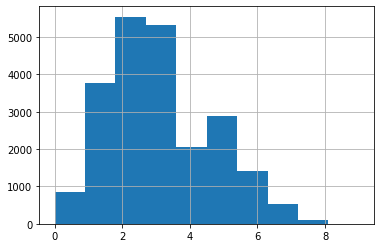

In [489]:
def compute_dash_score(df):
    # — convert everything to “per 1000 kcal” —
    chol_1000 = df['Cholesterol'] * 1000
    fiber_1000 = df['Fiber, total dietary'] * 1000
    mg_1000    = df['Magnesium, Mg'] * 1000
    ca_1000    = df['Calcium, Ca'] * 1000
    k_1000     = df['Potassium, K'] * 1000
    na_1000    = df['Sodium, Na'] * 1000

    # — grab your %‑of‑calorie columns —
    sat_pct = df['pct_saturated_fat_calories']
    fat_pct = df['pct_fat_calories']
    prot_pct = df['pct_protein_calories']

    score = pd.Series(0.0, index=df.index)

    # 1. Sat fat ≤6% / ≤11%
    score += np.select(
        [sat_pct <= 6, sat_pct <= 11],
        [1, 0.5], default=0
    )

    # 2. Total fat ≤27% / ≤32%
    score += np.select(
        [fat_pct <= 27, fat_pct <= 32],
        [1, 0.5], default=0
    )

    # 3. Protein ≥18% / ≥16.5%
    score += np.select(
        [prot_pct >= 18, prot_pct >= 16.5],
        [1, 0.5], default=0
    )

    # 4. Cholesterol ≤71.4 / ≤107.1 mg per 1000 kcal
    score += np.select(
        [chol_1000 <= 71.4, chol_1000 <= 107.1],
        [1, 0.5], default=0
    )

    # 5. Fiber ≥14.8 / ≥9.5 g per 1000 kcal
    score += np.select(
        [fiber_1000 >= 14.8, fiber_1000 >= 9.5],
        [1, 0.5], default=0
    )

    # 6. Magnesium ≥238 / ≥158 mg per 1000 kcal
    score += np.select(
        [mg_1000 >= 238, mg_1000 >= 158],
        [1, 0.5], default=0
    )

    # 7. Calcium ≥590 / ≥402 mg per 1000 kcal
    score += np.select(
        [ca_1000 >= 590, ca_1000 >= 402],
        [1, 0.5], default=0
    )

    # 8. Potassium ≥2238 / ≥1534 mg per 1000 kcal
    score += np.select(
        [k_1000 >= 2238, k_1000 >= 1534],
        [1, 0.5], default=0
    )

    # 9. Sodium ≤1143 / ≤1286 mg per 1000 kcal
    score += np.select(
        [na_1000 <= 1143, na_1000 <= 1286],
        [1, 0.5], default=0
    )

    return score

# apply and plot
log_day['DASH_score'] = compute_dash_score(log_day)
log_day['DASH_score'].hist()

In [490]:
# log_day['shannon_entropy_per_day'] = shannon_per_day

In [491]:
# def distance_from_macros(row, target_profile):
#     # Target profile is a dictionary with the target macronutrient percentages
#     return np.sqrt(
#         (row['pct_fat_calories'] - target_profile['Fat (%)'])**2 +
#         (row['pct_protein_calories'] - target_profile['Protein (%)'])**2 +
#         (row['pct_carb_calories'] - target_profile['Carbs (%)'])**2
#     )


# ideal_macros_med = {
#     'Fat (%)': 30,
#     'Protein (%)': 30,
#     'Carbs (%)': 40
# }

# macros_distance_med = log_day.apply(distance_from_macros, axis=1, target_profile=ideal_macros_med)
# macros_distance_med

In [492]:
# macros_distance_med.hist()

In [493]:
# log_day.to_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_day_{stage}.pkl")
# log_day = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/log_day_{stage}.pkl")
# log_day

### Calculate daily minimum requirements features

In [494]:
# new, DRI
thresholds_men_30_50 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 4,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 420,  # mg/d
    'Manganese, Mn': 2.3,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 11,  # mg/d
    'Potassium, K': 3400,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 900,  # µg/d
    'Vitamin C, total ascorbic acid': 90,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 120,  # µg/d
    'Thiamin': 1.2,  # mg/d
    'Riboflavin': 1.3,  # mg/d
    'Niacin': 16,  # mg/d
    'Vitamin B-6': 1.3,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 550,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 38.0,  # g/d
    'omega_6': 17,  # g/d (Linoleic Acid)
    'omega_3': 1.6,  # g/d (α-Linolenic Acid)
    'Protein': 56  # g/d
}

thresholds_men_51_70 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 4,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 420,  # mg/d
    'Manganese, Mn': 2.3,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 11,  # mg/d
    'Potassium, K': 3400,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 900,  # µg/d
    'Vitamin C, total ascorbic acid': 90,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 120,  # µg/d
    'Thiamin': 1.2,  # mg/d
    'Riboflavin': 1.3,  # mg/d
    'Niacin': 16,  # mg/d
    'Vitamin B-6': 1.7,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 550,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 30.0,  # g/d
    'omega_6': 14,  # g/d (Linoleic Acid)
    'omega_3': 1.6,  # g/d (α-Linolenic Acid)
    'Protein': 56  # g/d
}

thresholds_women_30_50 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 3,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 18,  # mg/d
    'Magnesium, Mg': 320,  # mg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 8,  # mg/d
    'Potassium, K': 2600,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 700,  # µg/d
    'Vitamin C, total ascorbic acid': 75,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 90,  # µg/d
    'Thiamin': 1.1,  # mg/d
    'Riboflavin': 1.1,  # mg/d
    'Niacin': 14,  # mg/d
    'Vitamin B-6': 1.3,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 425,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 25.0,  # g/d
    'omega_6': 12,  # g/d (Linoleic Acid)
    'omega_3': 1.1,  # g/d (α-Linolenic Acid)
    'Protein': 46  # g/d
}

thresholds_women_51_70 = {
    'Calcium, Ca': 1200,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 3,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 320,  # mg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 8,  # mg/d
    'Potassium, K': 2600,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 700,  # µg/d
    'Vitamin C, total ascorbic acid': 75,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 90,  # µg/d
    'Thiamin': 1.1,  # mg/d
    'Riboflavin': 1.1,  # mg/d
    'Niacin': 14,  # mg/d
    'Vitamin B-6': 1.5,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 425,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 21.0,  # g/d
    'omega_6': 11,  # g/d (Linoleic Acid)
    'omega_3': 1.1,  # g/d (α-Linolenic Acid)
    'Protein': 46  # g/d
}


thresholds_max = {
    'Calcium, Ca': 2500,  # mg/d
    'Iron, Fe': 45,  # mg/d
    'Zinc, Zn': 40,  # mg/d
    'Sodium, Na': 2300,  # mg/d
    'Vitamin A, RAE': 3000,  # µg/d
    'Vitamin C, total ascorbic acid': 2000,  # mg/d
    'Vitamin D (D2 + D3)': 100,  # µg/d
    'Vitamin E': 1000,  # mg/d
    'Manganese, Mn': 11,  # mg/d
    'Niacin': 35,  # mg/d
    'Vitamin B-6': 100,  # mg/d
    'Folate, total': 1000,  # µg/d
    'Choline, total': 3500,  # mg/d
    'Fluoride, F': 10,  # mg/d
    'Iodine': 1100,  # µg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 4000,  # mg/d
    'Selenium, Se': 400,  # µg/d
    'Copper, Cu': 10,  # mg/d
}

In [495]:
log_day = log_day.join(subjects_df[["age", "gender"]])
log_day = log_day.reset_index(level=[1], drop=True)
log_day = log_day.dropna()
log_day

Protein  Total lipid (fat)  \
RegistrationCode Date                                                      
10K_1007599726   2019-06-23 05:35:41.380792  0.047501           0.051135   
                 2019-06-23 05:35:41.380792  0.070019           0.060533   
                 2019-06-23 05:35:41.380792  0.054364           0.049575   
10K_1012020971   2019-05-30 09:08:02.650643  0.031672           0.039116   
                 2019-05-30 09:08:02.650643  0.036977           0.034994   
...                                               ...                ...   
10K_9984191583   2019-12-03 17:29:51.067111  0.049935           0.060855   
                 2019-12-03 17:29:51.067111  0.059233           0.046333   
                 2019-12-03 17:29:51.067111  0.036404           0.057094   
                 2019-12-03 17:29:51.067111  0.076796           0.039044   
                 2019-12-03 17:29:51.067111  0.058833           0.059261   

                                             Carbohydrate, by difference  \
RegistrationCode Date                                                      
10K_1007599726   2019-06-23 05:35:41.380792                     0.090124   
                 2019-06-23 05:35:41.380792                     0.041063   
                 2019-06-23 05:35:41.380792                     0.084087   
10K_1012020971   2019-05-30 09:08:02.650643                     0.136318   
                 2019-05-30 09:08:02.650643                     0.141525   
...                                                                  ...   
10K_9984191583   2019-12-03 17:29:51.067111                     0.065242   
                 2019-12-03 17:29:51.067111                     0.082940   
                 2019-12-03 17:29:51.067111                     0.091087   
                 2019-12-03 17:29:51.067111                     0.085452   
                 2019-12-03 17:29:51.067111                     0.057403   

                                                  Energy  Alcohol, ethyl  \
RegistrationCode Date                                                      
10K_1007599726   2019-06-23 05:35:41.380792  1463.855996             0.0   
                 2019-06-23 05:35:41.380792   930.740996             0.0   
                 2019-06-23 05:35:41.380792   609.334999             0.0   
10K_1012020971   2019-05-30 09:08:02.650643  1474.842500             0.0   
                 2019-05-30 09:08:02.650643  1907.051010             0.0   
...                                                  ...             ...   
10K_9984191583   2019-12-03 17:29:51.067111  1450.549866             0.0   
                 2019-12-03 17:29:51.067111   923.086656             0.0   
                 2019-12-03 17:29:51.067111  1095.519999             0.0   
                 2019-12-03 17:29:51.067111   759.137137             0.0   
                 2019-12-03 17:29:51.067111  1481.650000             0.0   

                                                Water  Fiber, total dietary  \
RegistrationCode Date                                                         
10K_1007599726   2019-06-23 05:35:41.380792  0.573928              0.007671   
                 2019-06-23 05:35:41.380792  0.537986              0.003488   
                 2019-06-23 05:35:41.380792  1.244299              0.008543   
10K_1012020971   2019-05-30 09:08:02.650643  0.681353              0.022232   
                 2019-05-30 09:08:02.650643  0.813369              0.024077   
...                                               ...                   ...   
10K_9984191583   2019-12-03 17:29:51.067111  0.673915              0.010589   
                 2019-12-03 17:29:51.067111  0.821839              0.012172   
                 2019-12-03 17:29:51.067111  1.095629              0.019397   
                 2019-12-03 17:29:51.067111  1.125073              0.008185   
                 2019-12-03 17:29:51.067111  0.684138              0.010171   

                                             Calciu

In [496]:
# if david:
#     # Step 1: Create a mapping of age & gender groups to thresholds
#     thresholds_lookup = {
#         ('male', 30, 50): thresholds_men_30_50,
#         ('male', 50, 70): thresholds_men_51_70,
#         ('female', 30, 50): thresholds_women_30_50,
#         ('female', 50, 70): thresholds_women_51_70,
#     }

#     # Step 2: Function to compute distances
#     def compute_distances(row):
#         # Determine gender & age
#         gender = 'male' if row["gender"] == 1 else 'female'
#         age = row["age"]
        
#         # Find correct thresholds
#         thresholds = None
#         for (g, min_age, max_age), thr in thresholds_lookup.items():
#             if gender == g and min_age <= age <= max_age:
#                 thresholds = thr
#                 break

#         # Skip if no matching thresholds
#         if thresholds is None:
#             return row

#         # Compute distance from DRI (minimum threshold)
#         for nutrient, min_val in thresholds.items():
#             if nutrient in row.index:
#                 row[f"{nutrient}_distance_from_DRI"] = row[nutrient] - (min_val / row["Energy"])
        
#         # Compute distance from UL (maximum threshold) if available
#         for nutrient, max_val in thresholds_max.items():
#             if nutrient in row.index:
#                 row[f"{nutrient}_distance_from_UL"] = row[nutrient] - (max_val / row["Energy"])
        
#         return row

#     # Step 3: Apply function efficiently
#     log_day = log_day.apply(compute_distances, axis=1)


In [497]:
# def check_threshold_ranges(data, thresholds):
#     issues = []
#     for nutrient, threshold in thresholds.items():
#         if nutrient in data.columns:
#             min_val = data[nutrient].min()
#             max_val = data[nutrient].max()
#             if not (min_val <= threshold / 1500 <= max_val):
#                 issues.append(f"{nutrient}: Threshold ({threshold}) is outside the range [{min_val*1500}, {max_val*1500}]")
#         else:
#             issues.append(f"{nutrient}: Column not found in the data")
#     return issues

# issues = check_threshold_ranges(log_day, thresholds_men_30_50)

# if issues:
#     print("Issues found with thresholds:")
#     for issue in issues:
#         print(issue)
# else:
#     print("All thresholds are within the range of their respective features.")


In [498]:
# if david:
#     import matplotlib.pyplot as plt
#     import pandas as pd
#     import numpy as np

#     # Select columns with distance from DRV
#     distance_columns = [col for col in log_day.columns if '_distance_from_UL' in col or '_distance_from_DRI' in col]

#     # Remove columns that contain only NaN values
#     valid_columns = [col for col in distance_columns if not log_day[col].isna().all()]

#     # If no valid columns exist, raise an informative error
#     if not valid_columns:
#         raise ValueError("No valid data to plot. All selected columns contain only NaN values.")

#     # Determine the maximum y-axis limit for all histograms
#     max_y = 0
#     for col in valid_columns:
#         counts, _ = np.histogram(log_day[col].dropna(), bins=20)  # Drop NaNs before histogram
#         max_y = max(max_y, counts.max())

#     # Determine grid size (e.g., 2 columns)
#     n_cols = 2
#     n_rows = (len(valid_columns) + n_cols - 1) // n_cols

#     # Plotting with uniform Y-axis
#     fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 4 * n_rows))

#     # Flatten axes for easy iteration
#     axes = axes.flatten()

#     for ax, col in zip(axes, valid_columns):
#         ax.hist(log_day[col].dropna(), bins=20, alpha=0.7)  # Drop NaNs before plotting
#         ax.set_title(f'{col}')
#         ax.set_xlabel('Distance from DRI')
#         ax.set_ylabel('Frequency')
#         ax.set_ylim(0, max_y)  # Set uniform Y-axis limit
#         ax.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0

#     # Hide any unused subplots
#     for ax in axes[len(valid_columns):]:
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()


In [499]:
# if david:
#     nan_columns_partial = [col for col in distance_columns if log_day[col].isna().any()]

#     print("Columns containing at least one NaN value:")
#     print(nan_columns_partial)


In [500]:
# if david:
#     log_day["Calcium, Ca_distance_from_DRI"].head()
#     log_day["Calcium, Ca_distance_from_DRI"].hist()

In [501]:
log_day = log_day.drop(columns=["age", "gender"])

## Variance Features

In [502]:
# # log_grouped = log_day.reset_index().groupby(['RegistrationCode']).mean()
# log_grouped = log_day.reset_index().drop("Day", axis=1).groupby(['RegistrationCode']).mean()
# log_grouped

In [503]:
# Step 1: Reset index and drop "Day"
log_reset = log_day.reset_index().drop("Date", axis=1)

# Group by RegistrationCode and calculate mean for all numeric columns
log_grouped = log_reset.groupby('RegistrationCode').mean()

log_grouped['hPDI_score_per_day'] = hPDI_score_per_day

cols_to_cv = [
    'Foods_per_day',
    'Foods_per_meal',
    'Meals_per_day',
    'plant_foods_per_day',
    'plant_foods_per_week',
    'vegetarian_score_per_day',
    'wfpb_score_per_day',
    'vegan_score_per_day',
    'carnivore_score_per_day',
    'aHEI_score_per_day',
    'IMEDAS_score_per_day',
    'eatLANCET_score_per_day',
    'Energy',
    'pct_protein_calories',
    'pct_carb_calories',
    'pct_fat_calories'
]


for col in cols_to_cv:
    # Add coefficient of variation for Foods_per_day and Meals_per_day
    group_std = log_reset.groupby('RegistrationCode')[col].std()
    group_mean = log_reset.groupby('RegistrationCode')[col].mean()

    log_grouped[f'{col}_cv'] = group_std / group_mean
    log_grouped.loc[group_mean == 0, f'{col}_cv'] = 0  # Set to zero if mean is zero




# Display the resulting DataFrame
log_grouped


,Protein,Total lipid (fat),"Carbohydrate, by difference",Energy,"Alcohol, ethyl",Water,"Fiber, total dietary","Calcium, Ca","Iron, Fe","Magnesium, Mg",...,wfpb_score_per_day_cv,vegan_score_per_day_cv,carnivore_score_per_day_cv,aHEI_score_per_day_cv,IMEDAS_score_per_day_cv,eatLANCET_score_per_day_cv,Energy_cv,pct_protein_calories_cv,pct_carb_calories_cv,pct_fat_calories_cv
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.057295,0.053748,0.071758,1001.310664,0.000000,0.785404,0.006567,0.653185,0.004329,0.193833,...,1.170608,0.664543,0.652460,0.137894,0.069282,0.0,0.431044,0.201440,0.372832,0.110289
10K_1012020971,0.033421,0.042810,0.120123,1884.873854,0.002508,0.662629,0.017801,0.371990,0.008504,0.213371,...,0.727673,0.306524,1.961188,0.196836,0.065600,0.0,0.259889,0.346727,0.169245,0.158547
10K_1012289523,0.038111,0.043770,0.114396,1457.900069,0.000000,0.341592,0.008750,0.323735,0.006590,0.141929,...,2.144435,0.290449,1.296529,0.145269,0.063562,0.0,0.283233,0.280379,0.151506,0.106461
10K_1019625838,0.050577,0.048630,0.092806,1261.473639,0.000000,0.810749,0.007721,0.616154,0.005865,0.146816,...,1.727531,0.317209,0.321003,0.104656,0.067937,0.0,0.252887,0.185800,0.118553,0.083068
10K_1021660035,0.039073,0.047636,0.108423,1459.031499,0.000000,0.750564,0.015790,0.489663,0.005503,0.176626,...,0.391157,0.273086,0.738324,0.076052,0.069367,0.0,0.453465,0.484123,0.179862,0.186323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.043921,0.049208,0.095592,1364.970587,0.000000,0.695209,0.007902,0.137862,0.006265,0.125137,...,1.998217,0.501166,1.041787,0.123939,0.065766,0.0,0.268922,0.580005,0.366569,0.169939
10K_9972023164,0.052279,0.046268,0.087150,2154.640779,0.004595,0.679656,0.009666,0.211692,0.007136,0.147488,...,0.927078,0.375443,0.549663,0.227096,0.072793,0.0,0.282675,0.255048,0.347770,0.244690
10K_9974013758,0.042661,0.037626,0.134262,970.511798,0.000000,1.175440,0.016350,0.778125,0.005798,0.314323,...,0.372883,0.149257,0.420990,0.123728,0.050462,0.0,0.250035,0.160601,0.121285,0.125839


## Food Names and Catergories Means per Day

In [504]:
# Recombine 'Day' and 'Hour' into a single 'Date' column (datetime type)
log_date_test = log_date.reset_index()
log_date_test['Date'] = pd.to_datetime(log_date_test['Day'] + log_date_test['Hour'], utc=True)
log_date_test = log_date_test.drop(columns=['Day', 'Hour']).set_index(['RegistrationCode', 'Date', 'food_id'])
log_date_test

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1007599726   2023-08-06 06:00:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
                                           1012989    49.0      41       NaN   
                 2023-08-06 09:07:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
...                                                    ...     ...       ...   
10K_9984191583   2023-12-12 17:24:00+00:00 1008938    45.0       2       NaN   
                                           1010094   175.0      48       NaN   
                                           1013053    80.0       2       NaN   
                 2023-12-12 19:50:00+00:00 1009319   186.0      41       NaN   
                                           1012524    89.0      40       NaN   

                                                   score   Protein  \
RegistrationCode Date                      food_id                   
10K_1007599726   2023-08-06 06:00:00+00:00 1006814   NaN  0.000005   
                                           1008880   NaN  0.001317   
                                           1012989   NaN  0.004104   
                 2023-08-06 09:07:00+00:00 1006814   NaN  0.000005   
                                           1008880   NaN  0.001317   
...                                                  ...       ...   
10K_9984191583   2023-12-12 17:24:00+00:00 1008938   NaN  0.005286   
                                           1010094   NaN  0.022559   
                                           1013053   NaN  0.003510   
                 2023-12-12 19:50:00+00:00 1009319   NaN  0.001130   
                                           1012524   NaN  0.000550   

                                                    Total lipid (fat)  \
RegistrationCode Date                      food_id                      
10K_1007599726   2023-08-06 06:00:00+00:00 1006814       8.197527e-07   
                                           1008880       1.371037e-03   
                                           1012989       3.846075e-03   
                 2023-08-06 09:07:00+00:00 1006814       8.197527e-07   
                                           1008880       1.371037e-03   
...                                                               ...   
10K_9984191583   2023-12-12 17:24:00+00:00 1008938       1.545912e-02   
                                           1010094       2.120103e-02   
                                           1013053       4.805453e-03   
                 2023-12-12 19:50:00+00:00 1009319       1.255357e-04   
                                           1012524       1.832079e-04   

                                                    Carbohydrate, by difference  \
RegistrationCode Date                      food_id                                
10K_1007599726   2023-08-06 06:00:00+00:00 1006814                     0.000000   
                                           1008880                     0.001933   
                                           1012989                     0.000335   
                 2023-08-06 09:07:00+00:00 1006814                     0.000000   
                                           1008880                     0.001933   
...                                                                         ...   
10K_9984191583   2023-12-12 17:24:00+00:00 1008938                     0.007197   
                                           1010094                     0.000709   
                                           1013053                     0.003726   
                 2023-12-12 19:50:00+00:00 1009319                     0.011800   
                                           1012524                     0.013678   

                                                     Energy  Alcohol, 

In [505]:
filtered_log = log_date_test[['weight', 'unit_id', 'meal_type', 'score']]
filtered_log

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1007599726   2023-08-06 06:00:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
                                           1012989    49.0      41       NaN   
                 2023-08-06 09:07:00+00:00 1006814     6.0       3       NaN   
                                           1008880    60.0       2       NaN   
...                                                    ...     ...       ...   
10K_9984191583   2023-12-12 17:24:00+00:00 1008938    45.0       2       NaN   
                                           1010094   175.0      48       NaN   
                                           1013053    80.0       2       NaN   
                 2023-12-12 19:50:00+00:00 1009319   186.0      41       NaN   
                                           1012524    89.0      40       NaN   

                                                   score  
RegistrationCode Date                      food_id        
10K_1007599726   2023-08-06 06:00:00+00:00 1006814   NaN  
                                           1008880   NaN  
                                           1012989   NaN  
                 2023-08-06 09:07:00+00:00 1006814   NaN  
                                           1008880   NaN  
...                                                  ...  
10K_9984191583   2023-12-12 17:24:00+00:00 1008938   NaN  
                                           1010094   NaN  
                                           1013053   NaN  
                 2023-12-12 19:50:00+00:00 1009319   NaN  
                                           1012524   NaN  

[285710 rows x 4 columns]

In [15]:

if stage == 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0.01, level='shortname_eng')
    diet_by_person = diet_category.df
if stage != 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0, level='shortname_eng')
    diet_by_person = diet_category.df
    existing_features = [feature for feature in all_diet_features if feature in diet_by_person.columns]
    print(len(existing_features))
    print(len(diet_by_person.columns))
    diet_by_person = diet_by_person[existing_features]

diet_by_person

add nutrients data - this takes some time


/home/tomerse/PycharmProjects/LabData/LabData/DataLoaders/DietLoggingLoader.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  log['just_date'] = log.index.get_level_values('Date').date


slicing the data, taking only days with over 500 kcal - this takes some time


shortname_eng,Acai,Acorn squash,Agave Syrup,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Anchovy,...,Zaatar,Zucchini,Zucchini Patties,black pepper,dried tomato spread,emmer wheat bread,ginger,goldenberry,kale,sucra light
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
10K_1001201093,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
10K_1002033709,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
10K_1002254441,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,142.384462,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.685714,0.0,0.000000,0.0
10K_1003113258,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,3.100850,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9998418497,0.0,0.0,0.0,0.262857,3.4977,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.026107,0.0,0.0,0.0,16.553571,0.000000,0.0,0.000000,0.0
10K_9998420917,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,24.393353,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,11.133333,0.746667,0.0,0.000000,0.0
10K_9998635752,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,1.921600,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [507]:
# Normalize by person to get mean % of daily calories
diet_by_person = diet_by_person.div(diet_by_person.sum(axis=1), axis=0)
diet_by_person

shortname_eng,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Yellow pepper,Yogurt,Zaatar,Zucchini,Zucchini Patties,black pepper,dried tomato spread,emmer wheat bread,ginger,kale
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,0.000000,0.110404,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
10K_1012020971,0.0,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
10K_1012289523,0.0,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
10K_1019625838,0.0,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.039356,0.0,0.0
10K_1021660035,0.0,0.000000,0.000000,0.009737,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.001927,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007365,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
10K_9972023164,0.0,0.000000,0.000000,0.000000,0.0,0.014433,0.0,0.000000,0.006780,0.0,...,0.000000,0.000000,0.000000,0.003852,0.0,0.0,0.0,0.008437,0.0,0.0
10K_9974013758,0.0,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,0.004327,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [508]:
food_shortnames = diet_by_person.columns
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/food_shortnames.pkl', 'wb') as file:
    pickle.dump(food_shortnames, file)
food_shortnames

Index(['Acorn squash', 'Alfalfa sprouts', 'Almond Beverage', 'Almond flour',
       'Almond spread', 'Almonds', 'Amba', 'Apple', 'Apple Cake',
       'Apple Vinegar',
       ...
       'Yellow pepper', 'Yogurt', 'Zaatar', 'Zucchini', 'Zucchini Patties',
       'black pepper', 'dried tomato spread', 'emmer wheat bread', 'ginger',
       'kale'],
      dtype='object', name='shortname_eng', length=570)

In [509]:
# Join nutrients and food logs
diet_by_person = diet_by_person.join(log_grouped, lsuffix='_food', rsuffix='_nutrient')
diet_by_person = diet_by_person.dropna()
diet_by_person


,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,wfpb_score_per_day_cv,vegan_score_per_day_cv,carnivore_score_per_day_cv,aHEI_score_per_day_cv,IMEDAS_score_per_day_cv,eatLANCET_score_per_day_cv,Energy_cv,pct_protein_calories_cv,pct_carb_calories_cv,pct_fat_calories_cv
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,1.170608,0.664543,0.652460,0.137894,0.069282,0.0,0.431044,0.201440,0.372832,0.110289
10K_1012020971,0.0,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,0.727673,0.306524,1.961188,0.196836,0.065600,0.0,0.259889,0.346727,0.169245,0.158547
10K_1012289523,0.0,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,2.144435,0.290449,1.296529,0.145269,0.063562,0.0,0.283233,0.280379,0.151506,0.106461
10K_1019625838,0.0,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,1.727531,0.317209,0.321003,0.104656,0.067937,0.0,0.252887,0.185800,0.118553,0.083068
10K_1021660035,0.0,0.000000,0.000000,0.009737,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.391157,0.273086,0.738324,0.076052,0.069367,0.0,0.453465,0.484123,0.179862,0.186323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007365,0.000000,0.0,...,1.998217,0.501166,1.041787,0.123939,0.065766,0.0,0.268922,0.580005,0.366569,0.169939
10K_9972023164,0.0,0.000000,0.000000,0.000000,0.0,0.014433,0.0,0.000000,0.006780,0.0,...,0.927078,0.375443,0.549663,0.227096,0.072793,0.0,0.282675,0.255048,0.347770,0.244690
10K_9974013758,0.0,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,0.372883,0.149257,0.420990,0.123728,0.050462,0.0,0.250035,0.160601,0.121285,0.125839


In [510]:
# Add categories
if stage == 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0.01, level='MainCategoryEng')
    diet_category_df = diet_category.df
elif stage != 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0, level='MainCategoryEng')
    diet_category_df = diet_category.df
    existing_features = [feature for feature in all_diet_features if feature in diet_category_df.columns]
    diet_category_df = diet_category_df[existing_features]
diet_category_df

add nutrients data - this takes some time


/home/tomerse/PycharmProjects/LabData/LabData/DataLoaders/DietLoggingLoader.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  log['just_date'] = log.index.get_level_values('Date').date


slicing the data, taking only days with over 500 kcal - this takes some time


MainCategoryEng,Bread,Cereals,AlcoholicDrinks,Beefveallambandothermeatproducts,Bread_wholewheat,Cannedvegandfruits,Deepfriedfoods,Drinks,Eggsandtheirproducts,FastFoods,...,Pulsesandproducts,Snacks,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,97.912000,131.117464,0.000000,...,0.000000,0.000000,0.000000,0.000000,42.926399,0.000000,0.000000,217.500000,0.00,53.674668
10K_1012020971,312.569957,3.630000,25.175000,39.598665,51.833333,23.926667,0.0,0.160000,0.000000,0.000000,...,146.401300,0.000000,11.795000,1.235000,129.209621,0.000000,40.791667,40.333333,0.00,273.276333
10K_1012289523,200.534037,12.271538,0.000000,42.347085,0.000000,2.144769,0.0,19.240154,76.626463,11.323846,...,32.199000,122.850000,0.000000,0.000000,57.481645,14.192308,0.000000,0.461538,11.04,296.830923
10K_1019625838,96.651000,0.000000,0.000000,26.001143,10.150000,10.080000,0.0,34.980000,25.080000,0.000000,...,11.190000,4.650000,0.000000,0.000000,47.649663,0.000000,0.000000,245.110000,0.00,414.890569
10K_1021660035,0.000000,0.000000,0.000000,39.241667,0.000000,11.662500,0.0,0.000000,28.943500,0.000000,...,104.940248,0.000000,0.000000,2.513333,235.098548,0.000000,0.000000,74.250000,0.00,246.164875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.000000,0.000000,0.000000,0.000000,6.900000,0.000000,0.0,6.700364,94.012728,0.000000,...,0.000000,10.952727,10.963636,0.000000,30.916563,0.000000,8.072727,28.112727,0.00,314.014457
10K_9972023164,199.141846,3.023077,107.953846,171.675691,0.000000,8.042308,0.0,1.993846,47.707077,0.000000,...,22.200000,8.378462,14.337231,0.000000,178.795306,0.000000,0.000000,0.000000,0.00,273.147171
10K_9974013758,0.000000,0.000000,0.000000,0.000000,32.823750,21.087500,0.0,11.250000,44.417974,0.000000,...,15.344100,0.000000,2.447500,1.243500,24.478925,0.000000,0.584250,153.763750,0.00,2.516000


In [511]:
# Normalize by person to get mean % of daily calories
diet_category_df = diet_category_df.div(diet_category_df.sum(axis=1), axis=0)
diet_category_df

MainCategoryEng,Bread,Cereals,AlcoholicDrinks,Beefveallambandothermeatproducts,Bread_wholewheat,Cannedvegandfruits,Deepfriedfoods,Drinks,Eggsandtheirproducts,FastFoods,...,Pulsesandproducts,Snacks,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.110871,0.148471,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.048608,0.000000,0.000000,0.246287,0.000000,0.060779
10K_1012020971,0.184494,0.002143,0.014860,0.023373,0.030595,0.014123,0.0,0.000094,0.000000,0.000000,...,0.086413,0.000000,0.006962,0.000729,0.076266,0.000000,0.024077,0.023807,0.000000,0.161301
10K_1012289523,0.142544,0.008723,0.000000,0.030101,0.000000,0.001525,0.0,0.013676,0.054468,0.008049,...,0.022888,0.087325,0.000000,0.000000,0.040859,0.010088,0.000000,0.000328,0.007847,0.210994
10K_1019625838,0.076636,0.000000,0.000000,0.020617,0.008048,0.007993,0.0,0.027736,0.019886,0.000000,...,0.008873,0.003687,0.000000,0.000000,0.037782,0.000000,0.000000,0.194352,0.000000,0.328973
10K_1021660035,0.000000,0.000000,0.000000,0.030085,0.000000,0.008941,0.0,0.000000,0.022190,0.000000,...,0.080455,0.000000,0.000000,0.001927,0.180243,0.000000,0.000000,0.056925,0.000000,0.188728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.000000,0.000000,0.000000,0.000000,0.005906,0.000000,0.0,0.005736,0.080476,0.000000,...,0.000000,0.009376,0.009385,0.000000,0.026465,0.000000,0.006910,0.024065,0.000000,0.268801
10K_9972023164,0.094246,0.001431,0.051090,0.081248,0.000000,0.003806,0.0,0.000944,0.022578,0.000000,...,0.010506,0.003965,0.006785,0.000000,0.084617,0.000000,0.000000,0.000000,0.000000,0.129270
10K_9974013758,0.000000,0.000000,0.000000,0.000000,0.038610,0.024805,0.0,0.013233,0.052248,0.000000,...,0.018049,0.000000,0.002879,0.001463,0.028794,0.000000,0.000687,0.180871,0.000000,0.002960


In [512]:
diet_categories = diet_category_df.columns
diet_categories

Index(['Bread', 'Cereals', 'AlcoholicDrinks',
       'Beefveallambandothermeatproducts', 'Bread_wholewheat',
       'Cannedvegandfruits', 'Deepfriedfoods', 'Drinks',
       'Eggsandtheirproducts', 'FastFoods', 'Fishandseafood', 'Fruits',
       'Hardcheese', 'Industrializedvegetarianfoodreadytoeat',
       'Lowcaloriesanddietdrinks', 'MedOilandfats', 'Nutsseedsandproducts',
       'Oilsandfats', 'Others', 'PastaGrainsandSidedishes',
       'PastaGrainsandSidedishes_wholewheat', 'Poultryanditsproducts',
       'Proccessedmeatproducts', 'Pulsesandproducts', 'Snacks',
       'Soupsandsauces', 'Spicesandherbs', 'Vegetables', 'bakedgoods',
       'fruitjuicesandsoftdrinks', 'milkcreamcheeseandyogurts',
       'sweetmilkproducts', 'sweets'],
      dtype='object', name='MainCategoryEng')

In [513]:
# diet_category_df.to_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_category_df_{stage}.pkl")

In [514]:
# Join with food categories
diet_by_person = diet_by_person.join(diet_category_df, rsuffix='_cat')
diet_by_person = diet_by_person.dropna()
list(diet_by_person.columns)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [515]:
# cols_to_drop = diet_by_person_std[diet_by_person_std < 0.01]
# diet_by_person = diet_by_person.drop(cols_to_drop.keys(), axis=1)
diet_by_person = diet_by_person.dropna(axis=1) # drop columns with null
diet_by_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 10K_1007599726 to 10K_9984191583
Columns: 705 entries, Acorn squash to sweets
dtypes: float64(704), int64(1)
memory usage: 10.9+ MB


In [516]:
diet_features = list(diet_by_person.columns)
diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [517]:
# dlld.df_categories = dll.add_food_categories(log)
# dlld.df_categories

In [518]:
# value_counts = dlld.df_categories['MainCategoryEng'].value_counts()
# print(value_counts)
# print(value_counts.shape)

In [519]:
# dlld.df_short_names = dll.add_short_food_names(dlld.df)
# dlld.df_short_names['shortname_eng'].value_counts()

In [520]:
# high_corr_pairs = corr_matrix[(np.abs(corr_matrix) > 0.9) & (corr_matrix != 1.0)]

# # Step 3: Unstack and filter to get pairs of features with correlation > 0.8
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [521]:
pd.reset_option('display.max_rows')

## Lifestyle Data

In [522]:
lll = LifeStyleLoader()
llld = lll.get_data(study_ids=study_ids)
llldf = llld.df
list(llldf.columns)

['accommodation_type',
 'accommodation_years',
 'add_salt_to_food',
 'age_last_smoking_regularly1',
 'age_last_smoking_regularly_age',
 'alcohol_drink',
 'alcohol_drink_past',
 'beer_cider_pints_month',
 'beer_cider_pints_week',
 'bread_slices_week',
 'cereals_bowels_week',
 'cheese_fat_percentage_how',
 'cheese_milk_products',
 'cigaretts_last_age',
 'cigaretts_last_age_age',
 'cigaretts_past_per_day',
 'cigaretts_past_per_day_number1',
 'cigaretts_present_per_day',
 'climb_staires_tymes_a_day',
 'coffee_cups_day',
 'coffee_type',
 'consider_yourself_morning_evening',
 'cooked_veg_tablespoons_day',
 'diet_major_changes_5years',
 'diet_vary_week_to_week',
 'distance_from_home_to_work',
 'dried_fruit_day',
 'drink_alcohol_with_meals',
 'drink_compared_10years',
 'drive_faster_often',
 'easy_getting_up',
 'easy_go_without_smoking_day',
 'eat_beef',
 'eat_cereals_how',
 'eat_cheese',
 'eat_chicken_poultry',
 'eat_kosher',
 'eat_lamb_mutton',
 'eat_margarine',
 'eat_moldy_cheese_how',
 'ea

In [523]:
exercise_related_words = [
    'high_exercise_duration',
    'high_exercise_times_a_month',
    'manual_physical_work',
    'moderate_activity_minutes',
    'physical_activity_maderate_days_a_week',
    'physical_activity_vigorous_days_a_week',
    'vigorous_activity_minutes',
    'walking_10min_days_a_week',
    'walking_minutes_day',
    'walking_standing_work',
    'activities_type__Strenuous exercise',
    'activities_type__Walk'
]

llldf[exercise_related_words].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29433 entries, ('10K_1000942861', Timestamp('2023-03-20 08:01:31.157109')) to ('10K_9999409119', Timestamp('2023-06-06 11:27:36.711406'))
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   high_exercise_duration                  20586 non-null  float64
 1   high_exercise_times_a_month             10926 non-null  float64
 2   manual_physical_work                    24535 non-null  float64
 3   moderate_activity_minutes               24682 non-null  float64
 4   physical_activity_maderate_days_a_week  25437 non-null  float64
 5   physical_activity_vigorous_days_a_week  8776 non-null   float64
 6   vigorous_activity_minutes               22806 non-null  float64
 7   walking_10min_days_a_week               25844 non-null  float64
 8   walking_minutes_day                     25102 non-null  float64
 9   walking_standin

In [524]:
llldf[exercise_related_words]

question_english                             high_exercise_duration  \
RegistrationCode Date                                                 
10K_1000942861   2023-03-20 08:01:31.157109                     3.0   
                 2023-12-26 06:15:29.926993                     3.0   
10K_1001201093   2021-08-25 20:03:45.752570                     7.0   
                 2022-08-02 06:37:59.966886                     3.0   
                 2023-07-04 11:58:07.738595                     3.0   
...                                                             ...   
10K_9999226141   2022-02-11 13:03:55.439020                     3.0   
                 2023-03-19 09:04:11.612344                     1.0   
                 2024-01-15 16:20:17.350467                     2.0   
10K_9999409119   2020-06-15 15:33:14.373624                     NaN   
                 2023-06-06 11:27:36.711406                    -1.0   

question_english                             high_exercise_times_a_month  \
RegistrationCode Date                                                      
10K_1000942861   2023-03-20 08:01:31.157109                          NaN   
                 2023-12-26 06:15:29.926993                          NaN   
10K_1001201093   2021-08-25 20:03:45.752570                          1.0   
                 2022-08-02 06:37:59.966886                          2.0   
                 2023-07-04 11:58:07.738595                          2.0   
...                                                                  ...   
10K_9999226141   2022-02-11 13:03:55.439020                          NaN   
                 2023-03-19 09:04:11.612344                          1.0   
                 2024-01-15 16:20:17.350467                          NaN   
10K_9999409119   2020-06-15 15:33:14.373624                          NaN   
                 2023-06-06 11:27:36.711406                          NaN   

question_english                             manual_physical_work  \
RegistrationCode Date                                               
10K_1000942861   2023-03-20 08:01:31.157109                   0.0   
                 2023-12-26 06:15:29.926993                   0.0   
10K_1001201093   2021-08-25 20:03:45.752570                   0.0   
                 2022-08-02 06:37:59.966886                   0.0   
                 2023-07-04 11:58:07.738595                   0.0   
...                                                           ...   
10K_9999226141   2022-02-11 13:03:55.439020                   1.0   
                 2023-03-19 09:04:11.612344                   0.0   
                 2024-01-15 16:20:17.350467                   NaN   
10K_9999409119   2020-06-15 15:33:14.373624                   NaN   
                 2023-06-06 11:27:36.711406                   0.0   

question_english                             moderate_activity_minutes  \
RegistrationCode Date                                                    
10K_1000942861   2023-03-20 08:01:31.157109                        0.0   
                 2023-12-26 06:15:29.926993                        NaN   
10K_1001201093   2021-08-25 20:03:45.752570                        NaN   
                 2022-08-02 06:37:59.966886                       10.0   
                 2023-07-04 11:58:07.738595                       10.0   
...                                                                ...   
10K_9999226141   2022-02-11 13:03:55.439020                       20.0   
                 2023-03-19 09:04:11.612344                        NaN   
                 2024-01-15 16:20:17.350467                       20.0   
10K_9999409119   2020-06-15 15:33:14.373624                        NaN   
                 2023-06-06 11:27:36.711406                        0.0   

question_english                             physical_activity_maderate_days_a_week  \
RegistrationCode Date                                                                 
10K_1000942861   2023-03-20 08:01:31.157109         

In [525]:
llldf[['vigorous_activity_minutes']].value_counts().sort_index()

vigorous_activity_minutes
0.0                          9206
1.0                           277
2.0                           308
3.0                           281
4.0                           115
                             ... 
330.0                           1
360.0                           6
420.0                           2
599.0                           1
600.0                           3
Length: 73, dtype: int64

In [526]:
# Define a function to classify activity levels based on walking and vigorous activity
def classify_activity(walking_minutes, vigorous_minutes, manual_work):
    walking_category = 'Sedentary'
    vigorous_category = 'Sedentary'
    
    # Classify based on walking minutes
    if walking_minutes < 30:
        walking_category = 'Sedentary'
    elif 30 <= walking_minutes <= 60:
        walking_category = 'Lightly active'
    elif 60 < walking_minutes <= 120:
        walking_category = 'Moderately active'
    else:
        walking_category = 'Very active'
    
    # Classify based on vigorous minutes
    if vigorous_minutes < 60:
        vigorous_category = 'Sedentary'
    elif 60 <= vigorous_minutes <= 180:
        vigorous_category = 'Lightly active'
    elif 180 < vigorous_minutes <= 300:
        vigorous_category = 'Moderately active'
    else:
        vigorous_category = 'Very active'
    
    # Determine the highest activity level
    categories = ['Sedentary', 'Lightly active', 'Moderately active', 'Very active', 'Super active']
    base_category = max(walking_category, vigorous_category, key=categories.index)
    # Increase activity level by one if manual physical work is 1
    if manual_work == 1:
        # base_index = categories.index(base_category)
        # if base_index < len(categories) - 1:  # Ensure we don't go out of bounds
        #     base_category = categories[base_index + 1]
        base_category = 'Super active'
    return base_category

# Apply the function to create the PAL column
llldf['PAL'] = llldf.apply(lambda row: classify_activity(row['walking_minutes_day'], row['vigorous_activity_minutes'], row['manual_physical_work']), axis=1)
llldf['PAL'].value_counts()

Lightly active       9315
Very active          8714
Sedentary            6923
Super active         3258
Moderately active    1223
Name: PAL, dtype: int64

In [527]:
lifestyle_diet_features = [
 'add_salt_to_food',
 'alcohol_drink',
 'alcohol_drink_past',
 'beer_cider_pints_month',
 'beer_cider_pints_week',
 'bread_slices_week',
 'cereals_bowels_week',
 'cheese_fat_percentage_how',
 'cheese_milk_products',
 'coffee_cups_day',
 'coffee_type',
 'cooked_veg_tablespoons_day',
 'diet_major_changes_5years',
 'diet_vary_week_to_week',
 'dried_fruit_day',
 'drink_alcohol_with_meals',
 'drink_compared_10years',
 'eat_beef',
 'eat_cereals_how',
 'eat_cheese',
 'eat_chicken_poultry',
 'eat_kosher',
 'eat_lamb_mutton',
 'eat_margarine',
 'eat_moldy_cheese_how',
 'eat_oily_fish',
 'eat_pork',
 'eat_processed_meat',
 'eatother_fish',
 'fortified_wine__glasses_month',
 'fortified_wine__glasses_week',
 'fresh_fruit_day',
 'hot_drinks_how_do_you_like',
 'last_ate_meat_age',
 'last_ate_meat_age_age',
 'liqueurs_measures_month',
 'liqueurs_measures_week',
 'milk_type',
 'other_alcoholic_glasses_month',
 'other_alcoholic_glasses_week',
 'raw_veg_tablespoons_day',
 'red_wine_glasses_month',
 'red_wine_glasses_week',
 'tea_cups_day',
 'vegeterian_yes_no',
 'water_glasses_day',
 'white_wine_glasses_month',
 'white_wine_glasses_week',
 'why_reduce_drinkng',
 'why_stop_drinking',
 'bread_type_mainly_eat__Another type of bread',
 'bread_type_mainly_eat__Dark',
 'bread_type_mainly_eat__Hot',
 'bread_type_mainly_eat__Other',
 'bread_type_mainly_eat__White',
 'bread_type_mainly_eat__Whole wheat',
 'bread_type_mainly_eat__dont know',
 'bread_type_mainly_eat__no',
 'bread_type_mainly_eat__prefer not to answer',
 'cereal_type__Cornflakes or branflakes',
 'cereal_type__Cornflakes with sugar (cookies, pillows, etc.)',
 'cereal_type__Granola',
 'cereal_type__Oatmeal',
 'cereal_type__dont know',
 'cereal_type__no',
 'cereal_type__prefer not to answer',
 'never_eat__Dairy products',
 'never_eat__Eggs or foods that contain eggs',
 'never_eat__I eat everything above',
 'never_eat__Sugar or foods / beverages that contain sugar',
 'never_eat__Wheat products',
 'never_eat__prefer not to answer',
 'oil_press_type_frying__Butter',
 'oil_press_type_frying__Cold pressed olive oil',
 'oil_press_type_frying__Margarine',
 'oil_press_type_frying__Oil - unknown type of pickling.',
 'oil_press_type_frying__Olive oil',
 'oil_press_type_frying__Other',
 'oil_press_type_frying__Other cold pressed oil',
 'oil_press_type_frying__Refined oil',
 'oil_press_type_frying__dont know',
 'oil_press_type_frying__no',
 'oil_type_frying__Butter',
 'oil_type_frying__Coconut oil',
 'oil_type_frying__Margarine',
 'oil_type_frying__Olive oil',
 'oil_type_frying__Soy',
 'oil_type_frying__Soy Oil',
 'oil_type_frying__Vegetable oil - unknown type',
 'oil_type_frying__canola oil',
 'oil_type_frying__dont know',
 'oil_type_frying__no',
 'oil_type_frying__sunflower oil'
]
len(lifestyle_diet_features)

93

In [528]:
lifestyle_diet_df = llldf[lifestyle_diet_features]
lifestyle_diet_df = lifestyle_diet_df.reset_index(level=[1], drop=True)
lifestyle_diet_df.head(30)

question_english,add_salt_to_food,alcohol_drink,alcohol_drink_past,beer_cider_pints_month,beer_cider_pints_week,bread_slices_week,cereals_bowels_week,cheese_fat_percentage_how,cheese_milk_products,coffee_cups_day,...,oil_type_frying__Coconut oil,oil_type_frying__Margarine,oil_type_frying__Olive oil,oil_type_frying__Soy,oil_type_frying__Soy Oil,oil_type_frying__Vegetable oil - unknown type,oil_type_frying__canola oil,oil_type_frying__dont know,oil_type_frying__no,oil_type_frying__sunflower oil
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1000942861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1001201093,NaN,1.0,NaN,NaN,0.0,7.0,1.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1001201093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1001201093,NaN,1.0,NaN,NaN,0.0,10.0,2.0,NaN,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1001201093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1002033709,NaN,3.0,NaN,NaN,1.0,7.0,NaN,4.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1002033709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1002087123,NaN,2.0,NaN,0.0,0.0,10.0,NaN,2.0,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [529]:
if stage == 'baseline':
    # Keep only baseline
    lifestyle_diet_df = lifestyle_diet_df[~lifestyle_diet_df.index.get_level_values(0).duplicated()]
elif stage == '02_00_visit':
    # Keep only the second entry (2nd visit)
    lifestyle_diet_df = lifestyle_diet_df.groupby(level=0).nth(1) 
elif stage == '04_00_visit':
    # Keep only the third entry (3rd visit)
    lifestyle_diet_df = lifestyle_diet_df.groupby(level=0).nth(2) 
lifestyle_diet_df.head(20)

question_english,add_salt_to_food,alcohol_drink,alcohol_drink_past,beer_cider_pints_month,beer_cider_pints_week,bread_slices_week,cereals_bowels_week,cheese_fat_percentage_how,cheese_milk_products,coffee_cups_day,...,oil_type_frying__Coconut oil,oil_type_frying__Margarine,oil_type_frying__Olive oil,oil_type_frying__Soy,oil_type_frying__Soy Oil,oil_type_frying__Vegetable oil - unknown type,oil_type_frying__canola oil,oil_type_frying__dont know,oil_type_frying__no,oil_type_frying__sunflower oil
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1001201093,NaN,1.0,NaN,NaN,0.0,10.0,2.0,NaN,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1002087123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1002254441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1007400622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1007699078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1008294272,1.0,NaN,NaN,NaN,0.0,NaN,0.0,2.0,NaN,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1012027362,NaN,NaN,NaN,1.0,0.0,14.0,1.0,1.0,2.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1012289523,NaN,3.0,NaN,NaN,0.0,4.0,NaN,4.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1012400211,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [530]:
if stage != 'baseline':
    # Filter all_diet_features to include only columns that exist in diet_by_person
    existing_features = [feature for feature in all_diet_features if feature in lifestyle_diet_df.columns]

    # Retain only the columns in existing_features
    lifestyle_diet_df = lifestyle_diet_df[existing_features]

In [531]:
if stage == 'baseline':
    # Remove features with more than 5% null values
    cols_to_drop = lifestyle_diet_df.isnull().sum() > len(lifestyle_diet_df) * 0.05
    cols_to_drop = cols_to_drop[cols_to_drop == True]
    lifestyle_diet_df = lifestyle_diet_df.drop(cols_to_drop.index, axis=1)
    lifestyle_diet_df.info()

In [532]:
if stage == 'baseline':
    lifestyle_diet_df = lifestyle_diet_df.apply(lambda col : col.fillna(col.mode()[0]))
    lifestyle_diet_df.info()

In [533]:
if stage == 'baseline':    
    # Irrelevant features
    cols_to_drop = list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("know")])
    cols_to_drop.extend(list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("answer")]))
    cols_to_drop.extend(list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("[oO]ther")]))
    cols_to_drop

In [534]:
if stage == 'baseline':
    lifestyle_diet_df = lifestyle_diet_df.drop(cols_to_drop, axis=1)
    lifestyle_diet_df.info()

In [535]:
lifestyle_diet_features = list(lifestyle_diet_df.columns)
lifestyle_diet_features

[]

## Other Features

In [536]:
# if stage == 'baseline':
#     pattern_features_df = pd.read_csv('/net/mraid20/export/genie/LabData/Data/10K/foods/upf_baseline.csv')
#     pattern_features_df = pattern_features_df.set_index('RegistrationCode')
#     pattern_features_df
# elif stage == '02_00_visit':
#     pattern_features_df = pd.read_csv('/net/mraid20/export/genie/LabData/Data/10K/foods/upf_2y.csv')
#     pattern_features_df = pattern_features_df.set_index('RegistrationCode')
#     pattern_features_df

In [537]:
# pattern_features_df = pattern_features_df[["NOVA Score"]]
# pattern_features_df.dropna(inplace=True)
# pattern_features_df

In [538]:
# pattern_features = list(pattern_features_df.columns)
# pattern_features

## BMR

In [539]:
bml = BodyMeasuresLoader()
bmld = bml.get_data(study_ids=study_ids, cols=['weight', 'height', 'bmr'])
bmldf = bmld.df
bmldf

bmr      height      weight
RegistrationCode Date                                                      
10K_1000942861   2021-12-13 07:09:38.954985     NaN  180.500000   91.800003
10K_1001201093   2021-08-26 07:39:21.411519     NaN  170.000000   59.400002
                 2023-09-12 10:23:05.534125     NaN  168.000000   58.799999
10K_1002033709   2022-08-03 07:20:01.044769     NaN  159.000000   55.000000
10K_1002087123   2019-12-04 11:53:40.350115  1805.0  169.800003  105.699997
...                                             ...         ...         ...
10K_9998635752   2024-04-08 06:49:26.293372     NaN  173.000000   67.000000
10K_9999226141   2020-01-21 08:54:23.012570  1894.0  179.000000   78.900002
                 2022-10-03 10:35:41.162233     NaN  178.000000   76.000000
                 2024-01-14 11:39:01.990983     NaN  177.000000   74.199997
10K_9999409119   2020-06-09 06:35:10.133884  1792.0  173.500000  113.300003

[23491 rows x 3 columns]

In [540]:
if stage == 'baseline':
    # Keep only baseline
    bmldf = bmldf[~bmldf.index.get_level_values(0).duplicated()]
    bmldf = bmldf.reset_index(level=[1], drop=True)
elif stage == '02_00_visit':
    # Keep only the second entry (2nd visit)
    bmldf = bmldf.groupby(level=0).nth(1) 
elif stage == '04_00_visit':
    # Keep only the second entry (3rd visit)
    bmldf = bmldf.groupby(level=0).nth(1) 
bmldf

,bmr,height,weight
RegistrationCode,,,
10K_1001201093,NaN,168.0,58.799999
10K_1002087123,NaN,169.0,98.500000
10K_1002254441,NaN,177.0,76.900002
10K_1007400622,NaN,154.0,65.699997
10K_1007474664,NaN,161.0,55.500000
...,...,...,...
10K_9995623290,NaN,190.5,94.599998
10K_9995746691,NaN,156.0,60.599998
10K_9995823183,NaN,178.0,65.000000


In [541]:
bmldf['bmr'].isnull().sum()

7406

In [542]:
bmldf = bmldf.join(subjects_df[['gender', 'age']], how='inner')
bmldf = bmldf.reset_index(level=[1], drop=True)
bmldf

,bmr,height,weight,gender,age
RegistrationCode,,,,,
10K_1001201093,NaN,168.0,58.799999,0.0,42.0
10K_1002087123,NaN,169.0,98.500000,0.0,42.0
10K_1002254441,NaN,177.0,76.900002,1.0,45.0
10K_1007400622,NaN,154.0,65.699997,0.0,64.0
10K_1007474664,NaN,161.0,55.500000,0.0,47.0
...,...,...,...,...,...
10K_9995623290,NaN,190.5,94.599998,1.0,54.0
10K_9995746691,NaN,156.0,60.599998,0.0,51.0
10K_9995823183,NaN,178.0,65.000000,1.0,46.0


In [543]:
# bmldf.loc[bmldf['gender'] == 0, 'bmr'] = bmldf.loc[bmldf['gender'] == 0, 'bmr'].fillna((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) - 161)
# bmldf.loc[bmldf['gender'] == 1, 'bmr'] = bmldf.loc[bmldf['gender'] == 1, 'bmr'].fillna((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) + 5)
bmldf.loc[bmldf['gender'] == 0, 'bmr'] = ((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) - 161)
bmldf.loc[bmldf['gender'] == 1, 'bmr'] = ((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) + 5)
bmldf['bmr']

# Use Mifflin-St Jeor Equation!
# Women: BMR=(10×weight in kg)+(6.25×height in cm)−(5×age in years)−161
# Men: BMR=(10×weight in kg)+(6.25×height in cm)−(5×age in years)+5

RegistrationCode
10K_1001201093    1266.999992
10K_1002087123    1670.250000
10K_1002254441    1655.250015
10K_1007400622    1138.499969
10K_1007474664    1165.250000
                     ...     
10K_9995623290    1871.624985
10K_9995746691    1164.999985
10K_9995823183    1537.500000
10K_9996884777    1300.500015
10K_9999226141    1672.500000
Name: bmr, Length: 7466, dtype: float64

In [544]:
physical_activity = llldf['PAL'][~llldf['PAL'].index.get_level_values(0).duplicated()].reset_index(level=[1], drop=True)

In [545]:
bmldf = bmldf.join(physical_activity, how='left')
bmldf['PAL'] = bmldf['PAL'].fillna('Sedentary')
bmldf

,bmr,height,weight,gender,age,PAL
RegistrationCode,,,,,,
10K_1001201093,1266.999992,168.0,58.799999,0.0,42.0,Sedentary
10K_1002087123,1670.250000,169.0,98.500000,0.0,42.0,Lightly active
10K_1002254441,1655.250015,177.0,76.900002,1.0,45.0,Very active
10K_1007400622,1138.499969,154.0,65.699997,0.0,64.0,Lightly active
10K_1007474664,1165.250000,161.0,55.500000,0.0,47.0,Lightly active
...,...,...,...,...,...,...
10K_9995623290,1871.624985,190.5,94.599998,1.0,54.0,Sedentary
10K_9995746691,1164.999985,156.0,60.599998,0.0,51.0,Lightly active
10K_9995823183,1537.500000,178.0,65.000000,1.0,46.0,Very active


Physical Activity Level (PAL): Multiplier based on activity level:
Sedentary (little to no exercise): BMR × 1.2
Lightly active (light exercise/sports 1-3 days/week): BMR × 1.375
Moderately active (moderate exercise/sports 3-5 days/week): BMR × 1.55
Very active (hard exercise/sports 6-7 days a week): BMR × 1.725
Super active (very hard exercise/sports & physical job): BMR × 1.9

In [546]:
bmldf

,bmr,height,weight,gender,age,PAL
RegistrationCode,,,,,,
10K_1001201093,1266.999992,168.0,58.799999,0.0,42.0,Sedentary
10K_1002087123,1670.250000,169.0,98.500000,0.0,42.0,Lightly active
10K_1002254441,1655.250015,177.0,76.900002,1.0,45.0,Very active
10K_1007400622,1138.499969,154.0,65.699997,0.0,64.0,Lightly active
10K_1007474664,1165.250000,161.0,55.500000,0.0,47.0,Lightly active
...,...,...,...,...,...,...
10K_9995623290,1871.624985,190.5,94.599998,1.0,54.0,Sedentary
10K_9995746691,1164.999985,156.0,60.599998,0.0,51.0,Lightly active
10K_9995823183,1537.500000,178.0,65.000000,1.0,46.0,Very active


In [547]:
# Define a function to calculate TDEE based on PAL category
def calculate_tdee(bmr, pal):
    pal_multipliers = {
        'Sedentary': 1.2,
        'Lightly active': 1.375,
        'Moderately active': 1.55,
        'Very active': 1.725,
        'Super active': 1.9
    }
    return bmr * pal_multipliers[pal]

# Apply the function to create the TDEE column
bmldf['TDEE'] = bmldf.apply(lambda row: calculate_tdee(row['bmr'], row['PAL']), axis=1)
bmldf['TDEE']

RegistrationCode
10K_1001201093    1520.399991
10K_1002087123    2296.593750
10K_1002254441    2855.306276
10K_1007400622    1565.437458
10K_1007474664    1602.218750
                     ...     
10K_9995623290    2245.949982
10K_9995746691    1601.874979
10K_9995823183    2652.187500
10K_9996884777    1788.187521
10K_9999226141    2007.000000
Name: TDEE, Length: 7466, dtype: float64

## Combine Dataframes

In [548]:
# diet_by_person.to_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_by_person_{stage}.pkl")

In [549]:
diet_by_person = diet_by_person.drop(columns=['Protein', 'Carbohydrate, by difference', 'Total lipid (fat)', 'Alcohol, ethyl', 'Fatty acids, total saturated'])

In [550]:
diet_by_person.shape

(2022, 700)

In [551]:
base_features = ["age", "gender"]
if stage == '02_00_visit':
    subjects_df["age"] = subjects_df["age"] + 2
elif stage == '04_00_visit':
    subjects_df["age"] = subjects_df["age"] + 4
diet_mb = diet_by_person.join(subjects_df[base_features])
diet_mb = diet_mb.reset_index(level=[1], drop=True)
diet_mb = diet_mb.dropna()
diet_mb = diet_mb.rename(columns={"gender": "sex"})
base_features = ["age", "sex"]
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,sex
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,0.000000,0.000000,0.048608,0.000000,0.000000,0.246287,0.000000,0.060779,59.0,0.0
10K_1012020971,0.0,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,0.006962,0.000729,0.076266,0.000000,0.024077,0.023807,0.000000,0.161301,45.0,1.0
10K_1012289523,0.0,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,0.000000,0.000000,0.040859,0.010088,0.000000,0.000328,0.007847,0.210994,46.0,0.0
10K_1019625838,0.0,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,0.000000,0.000000,0.037782,0.000000,0.000000,0.194352,0.000000,0.328973,73.0,1.0
10K_1021660035,0.0,0.000000,0.000000,0.009737,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.001927,0.180243,0.000000,0.000000,0.056925,0.000000,0.188728,51.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007365,0.000000,0.0,...,0.009385,0.000000,0.026465,0.000000,0.006910,0.024065,0.000000,0.268801,51.0,0.0
10K_9972023164,0.0,0.000000,0.000000,0.000000,0.0,0.014433,0.0,0.000000,0.006780,0.0,...,0.006785,0.000000,0.084617,0.000000,0.000000,0.000000,0.000000,0.129270,52.0,1.0
10K_9974013758,0.0,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,0.002879,0.001463,0.028794,0.000000,0.000687,0.180871,0.000000,0.002960,59.0,0.0


In [552]:
# print(lifestyle_diet_df.columns)
# diet_mb = diet_mb.join(lifestyle_diet_df, how='inner')
# diet_mb

In [553]:
# diet_mb = diet_mb.join(pattern_features_df, how='inner')
# diet_mb

In [554]:
# diet_mb = diet_mb.join(bmldf['TDEE'], how='inner')
# # diet_mb['caloric_restriction'] = diet_mb.apply(lambda row: 1 if row['TDEE'] > row['Energy'] else 0, axis=1)
# diet_mb['Energy Expenditure / Consumption Ratio'] = diet_mb['TDEE'] / diet_mb['Energy']
# diet_mb = diet_mb.drop('TDEE', axis=1)
# diet_mb['Energy Expenditure / Consumption Ratio'].hist()

<AxesSubplot:>

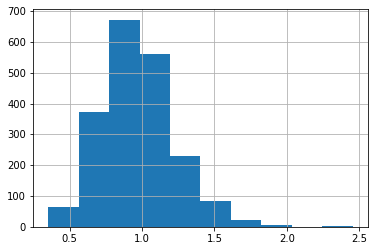

In [555]:
diet_mb = diet_mb.join(bmldf['bmr'], how='inner')
diet_mb['Energy / BMR'] = diet_mb['Energy'] / diet_mb['bmr']
diet_mb = diet_mb.drop('bmr', axis=1)
diet_mb['Energy / BMR'].hist()

In [556]:
diet_mb.isnull().sum().sort_values()

Acorn squash    0
Smoothies       0
Snickers        0
Soup mandels    0
Soy Patties     0
               ..
Greek Yogurt    0
Greek salad     0
Green Salad     0
Granola         0
Energy / BMR    9
Length: 703, dtype: int64

In [557]:
if stage == 'baseline':
    # Remove features with 0 variability
    cols_to_drop = list(diet_mb.columns[diet_mb.std() == 0])
    diet_mb = diet_mb.drop(cols_to_drop, axis=1)
    cols_to_drop

In [558]:
# # Scale from 0 to 1
# def MinMaxScale(feature):
#     return (feature - feature.min()) / (feature.max() - feature.min())


# diet_mb = diet_mb.apply(MinMaxScale)
# diet_mb.describe()

In [559]:
diet_mb.isnull().sum().sort_values()

Acorn squash    0
Smoothies       0
Snickers        0
Soup mandels    0
Soy Patties     0
               ..
Greek Yogurt    0
Greek salad     0
Green Salad     0
Granola         0
Energy / BMR    9
Length: 703, dtype: int64

In [560]:
diet_mb['Energy / BMR'] = diet_mb['Energy / BMR'].fillna(diet_mb['Energy / BMR'].median())


In [561]:
if stage != 'baseline':
    # remove remaining columns
    existing_features = [feature for feature in all_diet_features if feature in diet_mb.columns]
    diet_mb = diet_mb[existing_features]

In [562]:
if stage != 'baseline':
    # Convert diet_mb.columns to a set for comparison
    diet_mb_columns = set(diet_mb.columns)

    # Find differences
    only_in_all_diet_features = set(all_diet_features) - diet_mb_columns
    only_in_diet_mb_columns = diet_mb_columns - set(all_diet_features)

    # Check if there is a mismatch and show the different items
    if only_in_all_diet_features or only_in_diet_mb_columns:
        print("Mismatch between all_diet_features and diet_mb.columns.")
        if only_in_all_diet_features:
            print("Items only in all_diet_features:", only_in_all_diet_features)
        if only_in_diet_mb_columns:
            print("Items only in diet_mb.columns:", only_in_diet_mb_columns)
    else:
        print("Validation successful: all_diet_features contains the same items as diet_mb.columns.")


Mismatch between all_diet_features and diet_mb.columns.
Items only in all_diet_features: {'paleo_score_per_day', 'Fatty acids, total saturated', 'Phenylalanine', 'med_score_per_day', 'Glycine', 'Alanine', 'Lysine', 'NOVA Score', 'Isoleucine', 'Threonine', 'Tyrosine', 'Hydroxyproline', 'Glutamic acid', 'Arginine', 'Methionine', 'Tryptophan', 'gender', 'Proline', 'Histidine', 'Leucine', 'Cystine', 'Aspartic acid', 'Serine', 'Valine'}


In [563]:
if stage == 'baseline':
    if 'Water_nutrient' in diet_mb.columns:
        diet_mb.drop('Water_nutrient', axis=1, inplace=True)


In [564]:
# diet_corr = diet_mb[all_diet_features].corr()

# high_corr_pairs = diet_corr[(np.abs(diet_corr) > 0.9)]

# # Step 3: Unstack and filter to get pairs of features with correlation > 0.8
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [565]:
pd.reset_option('display.max_rows')

In [566]:
diet_category_df.columns

Index(['Bread', 'Cereals', 'AlcoholicDrinks',
       'Beefveallambandothermeatproducts', 'Bread_wholewheat',
       'Cannedvegandfruits', 'Deepfriedfoods', 'Drinks',
       'Eggsandtheirproducts', 'FastFoods', 'Fishandseafood', 'Fruits',
       'Hardcheese', 'Industrializedvegetarianfoodreadytoeat',
       'Lowcaloriesanddietdrinks', 'MedOilandfats', 'Nutsseedsandproducts',
       'Oilsandfats', 'Others', 'PastaGrainsandSidedishes',
       'PastaGrainsandSidedishes_wholewheat', 'Poultryanditsproducts',
       'Proccessedmeatproducts', 'Pulsesandproducts', 'Snacks',
       'Soupsandsauces', 'Spicesandherbs', 'Vegetables', 'bakedgoods',
       'fruitjuicesandsoftdrinks', 'milkcreamcheeseandyogurts',
       'sweetmilkproducts', 'sweets'],
      dtype='object', name='MainCategoryEng')

In [567]:
# Drop columns with high correlation

if "Lowcaloriesanddietdrinks" in diet_mb.columns:
    diet_mb = diet_mb.drop(columns=["Lowcaloriesanddietdrinks"])


In [568]:
diet_mb.shape

(2022, 691)

In [569]:
all_diet_features = list(diet_mb.columns)
len(all_diet_features)

691

In [570]:
all_diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [571]:
diet_mb.shape

(2022, 691)

In [572]:
if stage == 'baseline':
    diet_mb.to_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/diet_features_v4.pkl')
    with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/my_lists_diet_v4.pkl', 'wb') as file:
        pickle.dump([base_features, all_diet_features], file)
    
    # if david:
    #     diet_mb = diet_mb.drop(columns=distance_columns)
    #     all_diet_features = [feature for feature in all_diet_features if feature not in distance_columns]

    # diet_mb.to_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_features.pkl')
    # with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists_diet.pkl', 'wb') as file:
    #     pickle.dump([base_features, all_diet_features], file)
if stage != 'baseline':
    diet_mb.to_pickle(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/diet_features_{stage_suf}_v4.pkl')
    # if david:
    #     diet_mb = diet_mb.drop(columns=distance_columns)
    # diet_mb.to_pickle(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_features_{stage_suf}.pkl')

In [573]:
diet_mb.describe()

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,Energy / BMR
count,2022.00000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,...,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
mean,0.00014,0.000014,0.000681,0.000307,0.000616,0.007777,0.000010,0.009047,0.002629,0.000003,...,0.004509,0.000458,0.082204,0.009925,0.006292,0.049365,0.003660,0.100452,56.923838,0.972235
std,0.00144,0.000191,0.005396,0.003429,0.005593,0.018738,0.000131,0.016133,0.013081,0.000052,...,0.009676,0.002089,0.056128,0.024802,0.016993,0.052721,0.013619,0.080976,8.270545,0.251819
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.351512
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.042633,0.000000,0.000000,0.010399,0.000000,0.039284,50.000000,0.797447
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071823,0.000000,0.000000,0.034326,0.000000,0.084196,56.000000,0.953199
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.007506,0.000000,0.011824,0.000000,0.000000,...,0.005202,0.000000,0.109262,0.006455,0.005230,0.069932,0.000000,0.144809,63.000000,1.120698
max,0.03904,0.005306,0.115643,0.085792,0.095423,0.238319,0.004904,0.159065,0.321007,0.001508,...,0.147048,0.039932,0.542661,0.237980,0.261026,0.377814,0.298221,0.575362,79.000000,2.455500


In [574]:
diet_mb.isnull().sum().sort_values()

Acorn squash          0
Sheep Milk Yoghurt    0
Sheep milk Labaneh    0
Sherbet               0
Shrimp                0
                     ..
Granola bar           0
Grapefruit            0
Grapefruit juice      0
Goat Cheese           0
Energy / BMR          0
Length: 691, dtype: int64